In [2]:
pip install pyod

  Using cached pyod-1.0.4-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
import gc
import time

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import seaborn as sns
sns.set()
from pylab import rcParams
import pickle
from sklearn import metrics
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from pyod.utils.example import visualize
from pyod.models.hbos import HBOS
import warnings
import matplotlib.font_manager
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Dataset.csv', sep=',')
data.head(10)

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,0,1,0.0,50.0,50.0,0.000000,50.0,0,0,0,0,0
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,1,2,50.0,50.0,100.0,50.000000,25.0,0,0,0,0,0
2,ea44e97271691990157559d0bdd9959e02790c34db6c00...,1,1,10.0,10.0,20.0,10.000000,10.0,0,0,0,0,0
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,1,1,40.0,30.0,70.0,40.000000,30.0,0,0,0,0,0
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,1,2,30.0,30.0,60.0,30.000000,15.0,0,0,0,0,0
5,298ca2045d174f8a158961806ffc4ef96fad02d71a6b84...,1,0,1.0,0.0,1.0,1.000000,0.0,0,0,0,0,0
6,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,1,2,29.0,29.0,58.0,29.000000,14.5,0,0,0,0,0
7,4385fcf8b14497d0659adccfe06ae7e38e0b5dc95ff8a1...,1,1,1.0,1.0,2.0,1.000000,1.0,0,0,0,0,0
8,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,1,1,28.0,10.0,38.0,28.000000,10.0,0,0,0,0,0
9,a3b0e9e7cddbbe78270fa4182a7675ff00b92872d8df7d...,3,0,61.0,0.0,61.0,20.333333,0.0,0,0,0,0,0


In [3]:
data.drop('tx_hash', axis=1, inplace=True)
data.drop('in_malicious', axis=1, inplace=True)
data.drop('out_malicious', axis=1, inplace=True)
data.drop('is_malicious', axis=1, inplace=True)
data.drop('all_malicious', axis=1, inplace=True)




data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
count,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07
mean,2.148699e+00,2.148699e+00,5.484150e+01,5.484150e+01,1.096830e+02,4.923980e+01,2.877087e+01,3.570468e-06
std,7.421447e+00,4.512048e+00,1.303303e+03,1.301473e+03,2.602527e+03,9.729210e+02,7.125567e+02,1.889565e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,1.000000e-01,9.950000e-02,2.058720e-01,6.400000e-02,5.025776e-02,0.000000e+00
50%,1.000000e+00,2.000000e+00,9.325000e-01,9.590000e-01,1.964759e+00,5.350261e-01,4.900000e-01,0.000000e+00
75%,2.000000e+00,2.000000e+00,8.591912e+00,9.063657e+00,1.840000e+01,5.614287e+00,4.519481e+00,0.000000e+00
max,1.932000e+03,1.322000e+03,5.500000e+05,5.000207e+05,1.050000e+06,4.992596e+05,5.000000e+05,1.000000e+00


In [4]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['out_and_tx_malicious'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['out_and_tx_malicious'].value_counts()[1]/len(data) * 100,5), '% of the dataset')

No Frauds 100.0 % of the dataset
Frauds 0.00036 % of the dataset


In [5]:
data['out_and_tx_malicious'].value_counts()

0    30248026
1         108
Name: out_and_tx_malicious, dtype: int64

Scale Transform

In [6]:
# Log scale to normalize the data
sc_data = data.copy()

sc_data['indegree'] = np.log1p(sc_data['indegree'])
sc_data['outdegree']= np.log1p(sc_data['outdegree'])
sc_data['in_btc'] = np.log1p(sc_data['in_btc'])
sc_data['out_btc']= np.log1p(sc_data['out_btc'])
sc_data['total_btc']= np.log1p(sc_data['total_btc'])
sc_data['mean_in_btc']= np.log1p(sc_data['mean_in_btc'])
sc_data['mean_out_btc']= np.log1p(sc_data['mean_out_btc'])

# RobustScaler is less prone to outliers.

scaler = RobustScaler()

sc_data['indegree'] = scaler.fit_transform(sc_data['indegree'].values.reshape(-1,1))
sc_data['outdegree'] = scaler.fit_transform(sc_data['outdegree'].values.reshape(-1,1))
sc_data['in_btc'] = scaler.fit_transform(sc_data['in_btc'].values.reshape(-1,1))
sc_data['out_btc'] = scaler.fit_transform(sc_data['out_btc'].values.reshape(-1,1))
sc_data['total_btc'] = scaler.fit_transform(sc_data['total_btc'].values.reshape(-1,1))
sc_data['mean_in_btc'] = scaler.fit_transform(sc_data['mean_in_btc'].values.reshape(-1,1))
sc_data['mean_out_btc'] = scaler.fit_transform(sc_data['mean_out_btc'].values.reshape(-1,1))

In [7]:
sc_data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
count,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07
mean,6.132702e-01,-2.626722e-02,3.117960e-01,3.069471e-01,2.302426e-01,4.080517e-01,3.952796e-01,3.570468e-06
std,1.137854e+00,2.681126e-01,7.289874e-01,7.166882e-01,6.480901e-01,8.308393e-01,8.356174e-01,1.889565e-03
min,-1.709511e+00,-1.098612e+00,-3.042166e-01,-3.037088e-01,-3.912052e-01,-2.345382e-01,-2.403354e-01,0.000000e+00
25%,0.000000e+00,0.000000e+00,-2.602058e-01,-2.608668e-01,-3.238193e-01,-2.005871e-01,-2.107825e-01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,7.397942e-01,7.391332e-01,6.761807e-01,7.994129e-01,7.892175e-01,0.000000e+00
max,1.695258e+01,6.089045e+00,5.799225e+00,5.623103e+00,4.599418e+00,6.946344e+00,7.668286e+00,1.000000e+00


In [8]:
del data #free memory
gc.collect()

518

Split

In [9]:
train_x,test_x,train_y,test_y = train_test_split(sc_data.iloc[:,:-1], sc_data['out_and_tx_malicious'], test_size = 0.30, random_state=42)

In [10]:
pd.value_counts(train_y)

0    21173628
1          65
Name: out_and_tx_malicious, dtype: int64

In [11]:
pd.value_counts(test_y)

0    9074398
1         43
Name: out_and_tx_malicious, dtype: int64

In [11]:
del scaled_data #free memory
gc.collect()

0

TRain Sample

In [18]:


data_train = pd.concat([train_x, train_y], axis=1)
nonfraud_train = data_train[data_train.out_and_tx_malicious == 0]
fraud_train = data_train[data_train.out_and_tx_malicious == 1]

def get_training_sample(n):
    non_fraud = nonfraud_train.sample(n)
    trained_data = pd.concat([non_fraud, fraud_train])
    trained_data = shuffle(trained_data)

    return trained_data.iloc[:,:-1].values, trained_data.iloc[:,-1].values

Test Sample

In [19]:
data_test = pd.concat([test_x, test_y], axis=1)
nonfraud_test = data_test[data_test.out_and_tx_malicious == 0]
fraud_test = data_test[data_test.out_and_tx_malicious == 1]

def get_test_sample(n):
    non_fraud = nonfraud_test.sample(n)
    tested_data = pd.concat([non_fraud, fraud_test])
    tested_data = shuffle(tested_data)
    return tested_data.iloc[:,:-1].values, tested_data.iloc[:,-1].values

Oversample train data

In [20]:

def oversample_minority_class(X, y, fraction):
    SM = SMOTE(fraction, n_jobs=-1)
    return SM.fit_resample(X, y)

Eval Matrix

In [21]:
# def evaluate(actual, predicted, probability, time_complexity):
#     eval_metric = {}
#     eval_metric['time'] = time_complexity
#     eval_metric['conf_matrix'] = confusion_matrix(actual, predicted)

#     eval_metric['balanced_accuracy'] = round(balanced_accuracy_score(actual, predicted),7)
#     eval_metric['accuracy'] = round(accuracy_score(actual, predicted),7)

#     eval_metric['macro_precision'] = round(precision_score(actual, predicted, average="macro"),7)
#     eval_metric['macro_recall'] = round(recall_score(actual,predicted, average="macro"),7)
#     eval_metric['macro_f1'] = round(f1_score(actual,predicted, average="macro"),7)
#     eval_metric['macro_roc'] = round(roc_auc_score(actual, probability, average="macro"),7)


#     eval_metric['precision'] = round(precision_score(actual, predicted),7)
#     eval_metric['recall'] = round(recall_score(actual,predicted),7)
#     eval_metric['f1'] = round(f1_score(actual,predicted),7)
#     eval_metric['roc'] = round(roc_auc_score(actual, probability),7)

#     false_pos_rate, true_pos_rate, thresholds = roc_curve(actual, probability)
#     eval_metric['false_pos_rate'] = false_pos_rate
#     eval_metric['true_pos_rate'] = true_pos_rate
#     eval_metric['thresholds'] = thresholds

#     precision_rt, recall_rt, threshold_rt = precision_recall_curve(actual, probability)
#     eval_metric['precision_rt'] = precision_rt
#     eval_metric['recall_rt'] = recall_rt
#     eval_metric['threshold_rt'] = threshold_rt
#     return eval_metric


def met_eval(actual, predicted, probability, time_complexity):
    meteval = {}
    meteval['time'] = time_complexity
    meteval['conf_matrix'] = confusion_matrix(actual, predicted)

    meteval['balanced_accuracy'] = round(balanced_accuracy_score(actual, predicted),7)
    meteval['accuracy'] = round(accuracy_score(actual, predicted),7)

    meteval['macro_precision'] = round(precision_score(actual, predicted, average="macro"),7)
    meteval['macro_recall'] = round(recall_score(actual,predicted, average="macro"),7)
    meteval['macro_f1'] = round(f1_score(actual,predicted, average="macro"),7)
    meteval['macro_roc'] = round(roc_auc_score(actual, probability, average="macro"),7)


    meteval['precision'] = round(precision_score(actual, predicted),7)
    meteval['recall'] = round(recall_score(actual,predicted),7)
    meteval['f1'] = round(f1_score(actual,predicted),7)
    meteval['roc'] = round(roc_auc_score(actual, probability),7)

    false_pos_rate, true_pos_rate, thresholds = roc_curve(actual, probability)
    meteval['false_pos_rate'] = false_pos_rate
    meteval['true_pos_rate'] = true_pos_rate
    meteval['thresholds'] = thresholds

    precision_rt, recall_rt, threshold_rt = precision_recall_curve(actual, probability)
    meteval['precision_rt'] = precision_rt
    meteval['recall_rt'] = recall_rt
    meteval['threshold_rt'] = threshold_rt
    return meteval

Model fit

In [24]:


# iterations = 25
# random_state = 42
# training_sample_size = int(len(y_train) / 10)
# oversampling_fraction = 0.249
# outliers_fraction = oversampling_fraction

# print('Training Parameters:\n====================\n')
# print('Iterations: '+ str(iterations))
# print('Training Sample Size: '+ str(training_sample_size))
# print('Oversampling Fraction: '+ str(oversampling_fraction))
# print('Outliers Fraction: '+ str(outliers_fraction))


# # best: {'alpha': 0.7140354276549626, 'n_bins': 7.4609367241884765, 'outliers_fraction': 0.24962378421955286, 'tol': 0.3798459940762142}


# def fit_model(X_train):
#     clf = HBOS(n_bins=8, alpha=0.714, tol=0.379, contamination=outliers_fraction)
#     clf.fit(X_train)
#     return clf



iters = 15
rand_state = 42
train_ssize = int(len(train_y) / 10)
sampl_frac = 0.057
out_frac = sampl_frac

print('Training Parameters:\n====================\n')
print('Iterations: '+ str(iters))
print('Training Sample Size: '+ str(train_ssize))
print('Oversampling Fraction: '+ str(sampl_frac))
print('Outliers Fraction: '+ str(out_frac))



def fit_model(train):
    clf = HBOS(n_bins=7, alpha=0.714, tol=0.37, contamination=out_frac)
    clf.fit(train)
    return clf

Training Parameters:

Iterations: 15
Training Sample Size: 2117369
Oversampling Fraction: 0.057
Outliers Fraction: 0.057


Iterative model

In [25]:


eval_train = {}
eval_test = {}
mod = {}

# for i in range(0, iterations):
#     sample_Xtrain, sample_ytrain = get_training_sample(training_sample_size)
#     X_train, y_train = oversample_minority_class(sample_Xtrain, sample_ytrain, oversampling_fraction)
#     print("Iteration "+ str(i+1)+ " in progress...")
for i in range(0, iters):
    train_samplex, train_sampley = get_training_sample(train_ssize)
    x_train, y_train = oversample_minority_class(train_samplex, train_sampley, sampl_frac)
    print("Iteration "+ str(i+1) + " in progress...")


    # #Modeling
    # start = time.time()
    # clf = fit_model(X_train)
    # end = time.time()
    # # get the prediction labels and outlier scores of the training data
    # y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    # y_train_scores = clf.decision_scores_  # raw outlier scores
    
    #Modeling
    start = time.time()
    clf = fit_model(x_train)
    end = time.time()
    # get the prediction labels and outlier scores of the training data
    pred_trainy = clf.labels_  # binary labels (0: inliers, 1: outliers)
    score_trainy = clf.decision_scores_  # raw outlier scores
    

    # training_time = round(end - start, 4)
    # model[i+1] = clf
    # training_evaluations[i+1] = evaluate(y_train, y_train_pred, y_train_scores, training_time)
    
    train_time = round(end - start, 4)
    mod[i+1] = clf
    eval_train[i+1] = met_eval(y_train, pred_trainy, score_trainy, train_time)

    print("Iteration "+ str(i+1)+ " Trained")

    # test_start = time.time()
    # y_test_pred = clf.predict(x_test)
    # y_test_scores = clf.decision_function(x_test)
    # test_end = time.time()
    # testing_time = round(test_end - test_start, 4)
    # test_evaluations[i+1] = evaluate(y_test, y_test_pred, y_test_scores, testing_time)
    
    test_start = time.time()
    pred_testy = clf.predict(test_x)
    score_testy = clf.decision_function(test_x)
    end_test = time.time()
    time_test = round(end_test - test_start, 4)
    eval_test[i+1] = met_eval(test_y, pred_testy, score_testy, time_test)

    # print("Iteration: (" + str((i+1)) + "/" + str(iterations) + ")    Training Time: "+str(training_time)+" seconds     Testing Time: "+ str(testing_time)+ " seconds")

# print("Iterative Modeling Completed!")

    print("Iteration: (" + str((i+1)) + "/" + str(iters) + ")    Training Time: "+str(train_time)+" seconds     Testing Time: "+ str(time_test)+ " seconds")

print("Iterative Modeling Completed!")

Iteration 1 in progress...
Iteration 1 Trained
Iteration: (1/15)    Training Time: 2.9314 seconds     Testing Time: 5.8584 seconds
Iteration 2 in progress...
Iteration 2 Trained
Iteration: (2/15)    Training Time: 0.6081 seconds     Testing Time: 3.2831 seconds
Iteration 3 in progress...
Iteration 3 Trained
Iteration: (3/15)    Training Time: 0.6253 seconds     Testing Time: 3.3049 seconds
Iteration 4 in progress...
Iteration 4 Trained
Iteration: (4/15)    Training Time: 0.6308 seconds     Testing Time: 3.3274 seconds
Iteration 5 in progress...
Iteration 5 Trained
Iteration: (5/15)    Training Time: 0.6375 seconds     Testing Time: 3.2505 seconds
Iteration 6 in progress...
Iteration 6 Trained
Iteration: (6/15)    Training Time: 0.6412 seconds     Testing Time: 3.2513 seconds
Iteration 7 in progress...
Iteration 7 Trained
Iteration: (7/15)    Training Time: 0.6296 seconds     Testing Time: 3.1213 seconds
Iteration 8 in progress...
Iteration 8 Trained
Iteration: (8/15)    Training Time: 

Tabular Eval

In [27]:
eval_train_data = pd.DataFrame(columns=['Iteration','Accuracy','Balanced-Accuracy','Macro-Precision','Macro-Recall','Macro-F1','Macro-ROC', 'Precision', 'Recall', 'F1', 'ROC', 'Time'])

In [28]:
for it in list(eval_train.keys()):
    eval_train_data = eval_train_data.append({'Iteration' : str(it),
                                                'Accuracy' : eval_train[it]['accuracy'],
                                                'Balanced-Accuracy' : eval_train[it]['balanced_accuracy'],
                                                'Macro-Precision' : eval_train[it]['macro_precision'],
                                                'Macro-Recall' : eval_train[it]['macro_recall'],
                                                'Macro-F1' : eval_train[it]['macro_f1'],
                                                'Macro-ROC' : eval_train[it]['macro_roc'],
                                                'Precision' : eval_train[it]['precision'],
                                                'Recall' : eval_train[it]['recall'],
                                                'F1' : eval_train[it]['f1'],
                                                'ROC' : eval_train[it]['roc'],
                                                'Time' : eval_train[it]['time']
                                                }, ignore_index=True)

In [29]:
eval_train_data.sort_values('Macro-F1', ascending=True)

,Iteration,Accuracy,Balanced-Accuracy,Macro-Precision,Macro-Recall,Macro-F1,Macro-ROC,Precision,Recall,F1,ROC,Time
9,10,0.949995,0.768169,0.754757,0.768169,0.761258,0.893106,0.534425,0.564363,0.548986,0.893106,0.6206
14,15,0.950013,0.768312,0.754844,0.768312,0.761371,0.889930,0.534583,0.564645,0.549203,0.889930,0.6277
1,2,0.950240,0.769577,0.755898,0.769577,0.762525,0.891286,0.536553,0.567073,0.551391,0.891286,0.6081
13,14,0.950431,0.769752,0.756798,0.769752,0.763085,0.892480,0.538339,0.567230,0.552407,0.892480,0.6495
10,11,0.952894,0.769245,0.769165,0.769245,0.769205,0.890091,0.563217,0.563394,0.563305,0.890091,0.6248
2,3,0.954847,0.762706,0.780792,0.762706,0.771396,0.890141,0.587287,0.547336,0.566608,0.890141,0.6253
8,9,0.954951,0.762678,0.781410,0.762678,0.771666,0.893438,0.588528,0.547162,0.567092,0.893438,0.6093
3,4,0.953688,0.770207,0.773327,0.770207,0.771757,0.892997,0.571458,0.564546,0.567981,0.892997,0.6308
7,8,0.954844,0.764177,0.780565,0.764177,0.772081,0.891818,0.586664,0.550460,0.567986,0.891818,0.9694
4,5,0.953657,0.771347,0.773055,0.771347,0.772198,0.891642,0.570782,0.566998,0.568883,0.891642,0.6375


In [30]:
eval_train_data.sort_values('ROC', ascending=True)

,Iteration,Accuracy,Balanced-Accuracy,Macro-Precision,Macro-Recall,Macro-F1,Macro-ROC,Precision,Recall,F1,ROC,Time
14,15,0.950013,0.768312,0.754844,0.768312,0.761371,0.889930,0.534583,0.564645,0.549203,0.889930,0.6277
10,11,0.952894,0.769245,0.769165,0.769245,0.769205,0.890091,0.563217,0.563394,0.563305,0.890091,0.6248
2,3,0.954847,0.762706,0.780792,0.762706,0.771396,0.890141,0.587287,0.547336,0.566608,0.890141,0.6253
1,2,0.950240,0.769577,0.755898,0.769577,0.762525,0.891286,0.536553,0.567073,0.551391,0.891286,0.6081
4,5,0.953657,0.771347,0.773055,0.771347,0.772198,0.891642,0.570782,0.566998,0.568883,0.891642,0.6375
7,8,0.954844,0.764177,0.780565,0.764177,0.772081,0.891818,0.586664,0.550460,0.567986,0.891818,0.9694
13,14,0.950431,0.769752,0.756798,0.769752,0.763085,0.892480,0.538339,0.567230,0.552407,0.892480,0.6495
3,4,0.953688,0.770207,0.773327,0.770207,0.771757,0.892997,0.571458,0.564546,0.567981,0.892997,0.6308
9,10,0.949995,0.768169,0.754757,0.768169,0.761258,0.893106,0.534425,0.564363,0.548986,0.893106,0.6206
8,9,0.954951,0.762678,0.781410,0.762678,0.771666,0.893438,0.588528,0.547162,0.567092,0.893438,0.6093


In [31]:
eval_test_data = pd.DataFrame(columns=['Iteration','Accuracy','Balanced-Accuracy','Macro-Precision','Macro-Recall','Macro-F1','Macro-ROC', 'Precision', 'Recall', 'F1', 'ROC', 'Time'])

for it in list(eval_test.keys()):
    eval_test_data = eval_test_data.append({'Iteration' : str(it),
                                        'Accuracy' : eval_test[it]['accuracy'],
                                        'Balanced-Accuracy' : eval_test[it]['balanced_accuracy'],
                                        'Macro-Precision' : eval_test[it]['macro_precision'],
                                        'Macro-Recall' : eval_test[it]['macro_recall'],
                                        'Macro-F1' : eval_test[it]['macro_f1'],
                                        'Macro-ROC' : eval_test[it]['macro_roc'],
                                        'Precision' : eval_test[it]['precision'],
                                        'Recall' : eval_test[it]['recall'],
                                        'F1' : eval_test[it]['f1'],
                                        'ROC' : eval_test[it]['roc'],
                                        'Time' : eval_test[it]['time']
                                        }, ignore_index=True)



In [32]:
eval_test_data.sort_values('Macro-F1', ascending=True)

,Iteration,Accuracy,Balanced-Accuracy,Macro-Precision,Macro-Recall,Macro-F1,Macro-ROC,Precision,Recall,F1,ROC,Time
14,15,0.971995,0.683673,0.500032,0.683673,0.492966,0.897642,0.000067,0.395349,0.000134,0.897642,3.2218
1,2,0.972024,0.683688,0.500032,0.683688,0.492974,0.899368,0.000067,0.395349,0.000134,0.899368,3.2831
9,10,0.972039,0.695323,0.500034,0.695323,0.492982,0.898965,0.000071,0.418605,0.000142,0.898965,3.2075
13,14,0.972369,0.683860,0.500032,0.683860,0.493063,0.897615,0.000068,0.395349,0.000136,0.897615,3.3068
10,11,0.975226,0.673661,0.500034,0.673661,0.493800,0.898976,0.000071,0.372093,0.000142,0.898976,3.2658
4,5,0.975654,0.673875,0.500035,0.673875,0.493911,0.899123,0.000072,0.372093,0.000145,0.899123,3.2505
12,13,0.975800,0.673948,0.500035,0.673948,0.493949,0.899478,0.000073,0.372093,0.000146,0.899478,3.0242
3,4,0.975819,0.685585,0.500037,0.685585,0.493958,0.901009,0.000077,0.395349,0.000155,0.901009,3.3274
11,12,0.975822,0.685587,0.500037,0.685587,0.493959,0.901003,0.000077,0.395349,0.000155,0.901003,3.0211
0,1,0.976448,0.685900,0.500038,0.685900,0.494121,0.898677,0.000079,0.395349,0.000159,0.898677,5.8584


In [33]:
eval_test_data.sort_values('ROC', ascending=True)

,Iteration,Accuracy,Balanced-Accuracy,Macro-Precision,Macro-Recall,Macro-F1,Macro-ROC,Precision,Recall,F1,ROC,Time
2,3,0.978238,0.663539,0.500036,0.663539,0.494576,0.896987,0.000076,0.348837,0.000152,0.896987,3.3049
13,14,0.972369,0.683860,0.500032,0.683860,0.493063,0.897615,0.000068,0.395349,0.000136,0.897615,3.3068
14,15,0.971995,0.683673,0.500032,0.683673,0.492966,0.897642,0.000067,0.395349,0.000134,0.897642,3.2218
7,8,0.978020,0.663430,0.500036,0.663430,0.494519,0.897833,0.000075,0.348837,0.000150,0.897833,3.6787
8,9,0.978306,0.663573,0.500036,0.663573,0.494593,0.898020,0.000076,0.348837,0.000152,0.898020,3.2873
6,7,0.978025,0.663433,0.500036,0.663433,0.494520,0.898055,0.000075,0.348837,0.000150,0.898055,3.1213
5,6,0.978005,0.663423,0.500036,0.663423,0.494515,0.898253,0.000075,0.348837,0.000150,0.898253,3.2513
0,1,0.976448,0.685900,0.500038,0.685900,0.494121,0.898677,0.000079,0.395349,0.000159,0.898677,5.8584
9,10,0.972039,0.695323,0.500034,0.695323,0.492982,0.898965,0.000071,0.418605,0.000142,0.898965,3.2075
10,11,0.975226,0.673661,0.500034,0.673661,0.493800,0.898976,0.000071,0.372093,0.000142,0.898976,3.2658


Visualization/ Visual Metrics

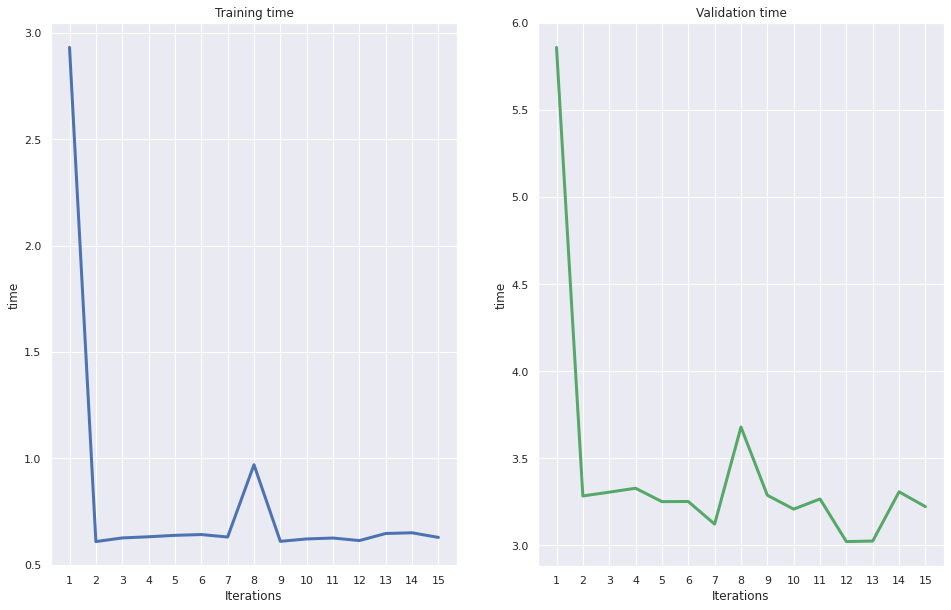

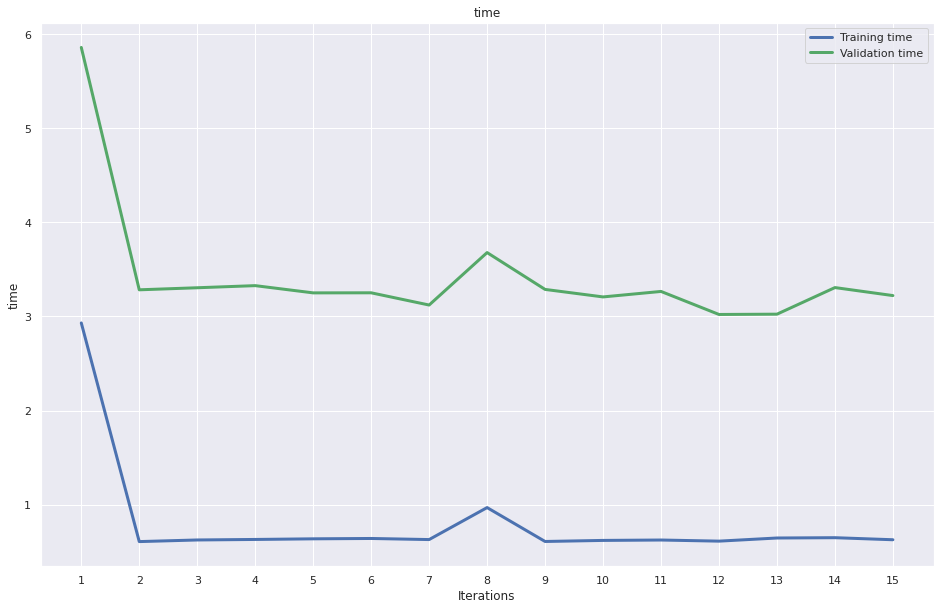

In [34]:
metrics = ['time']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

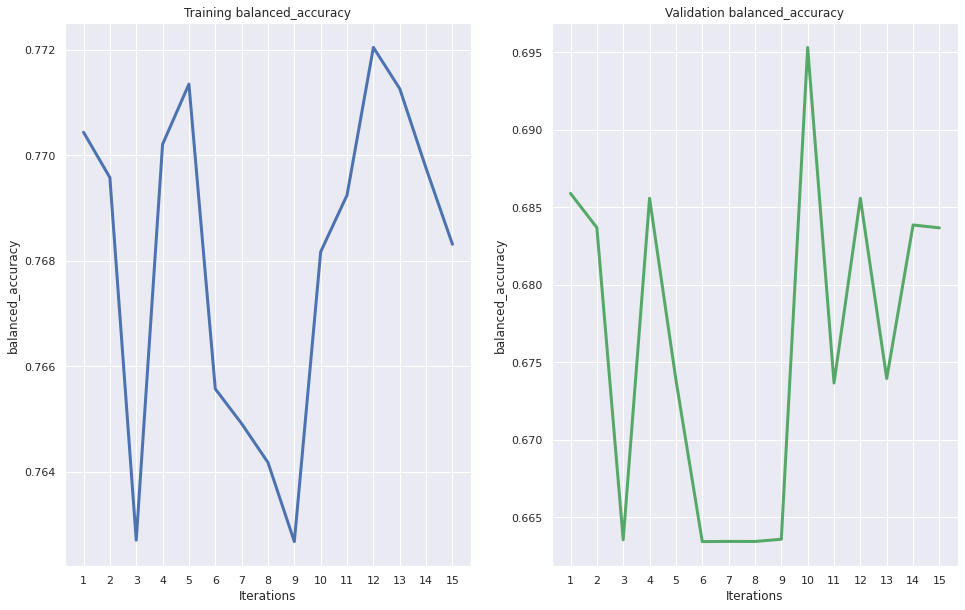

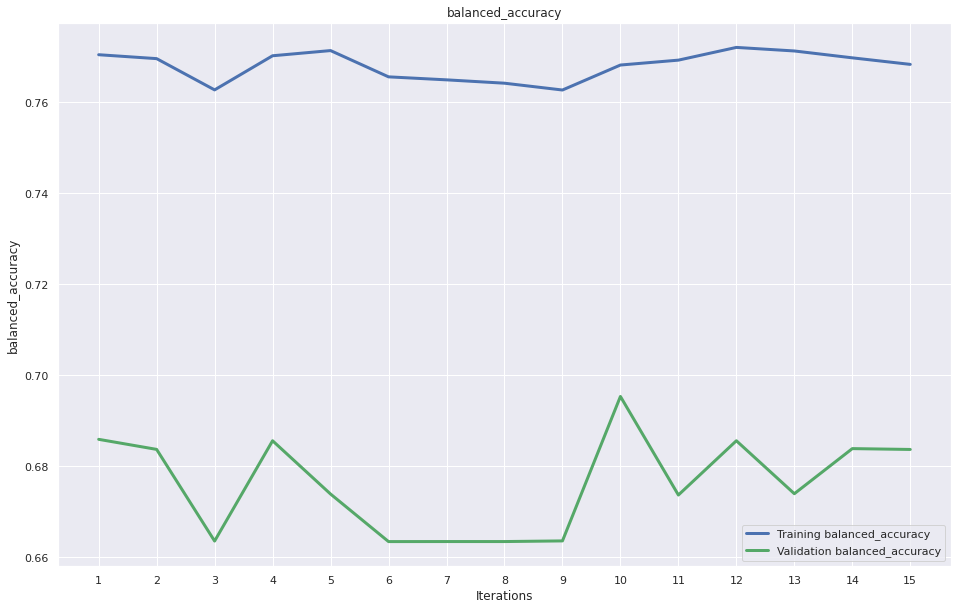

In [35]:
metrics = [ 'balanced_accuracy']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

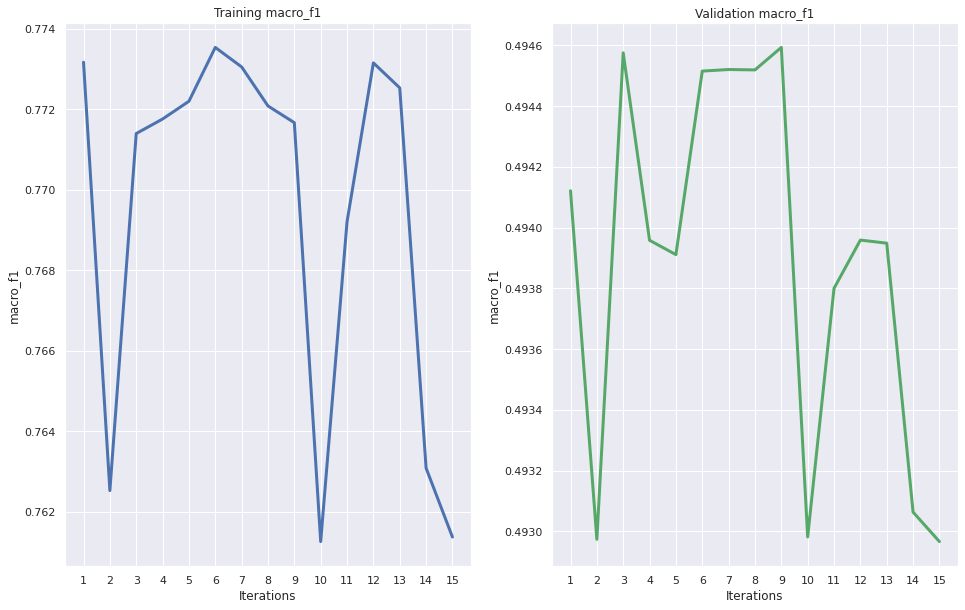

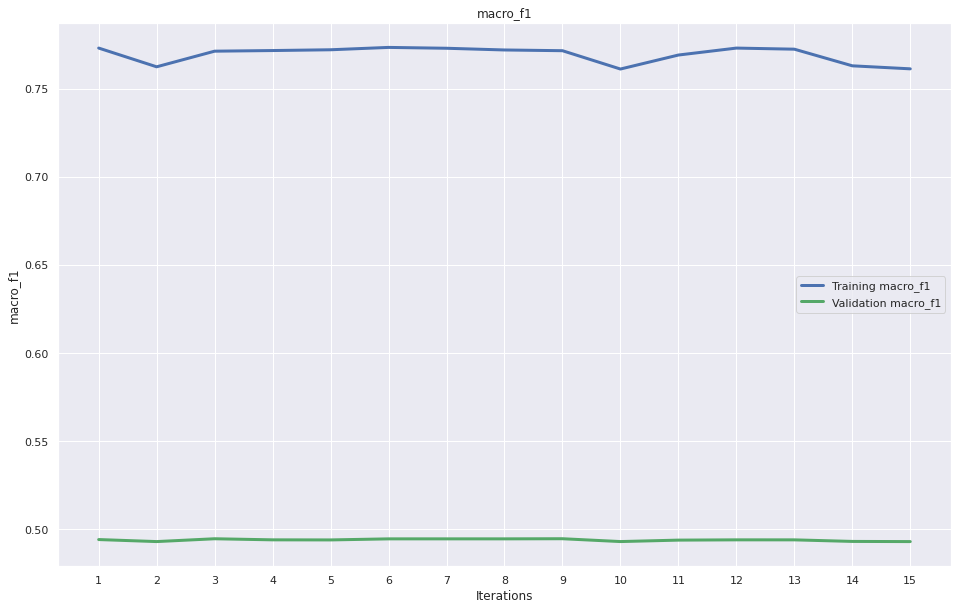

In [36]:
metrics = ['macro_f1']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

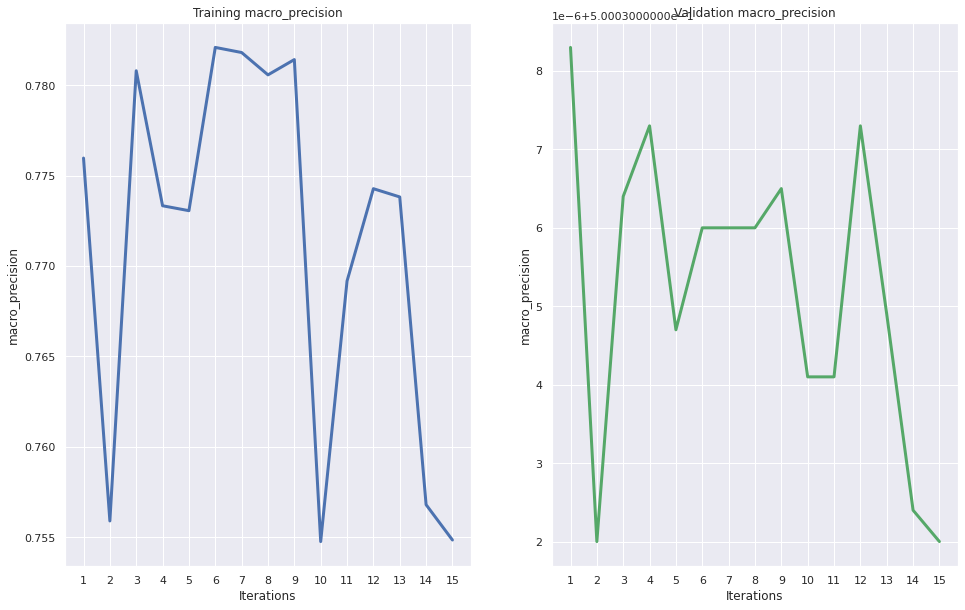

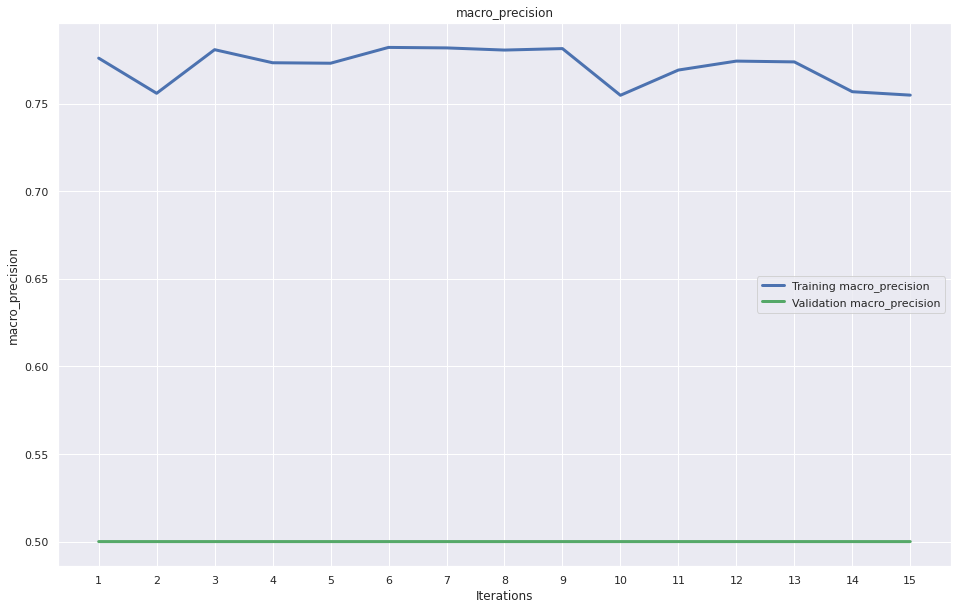

In [37]:
metrics = [ 'macro_precision']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

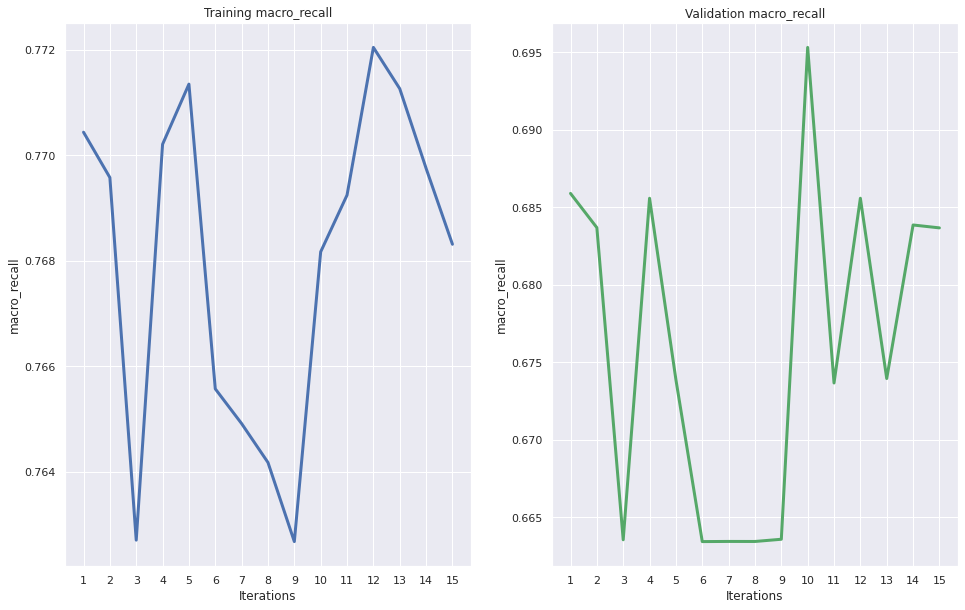

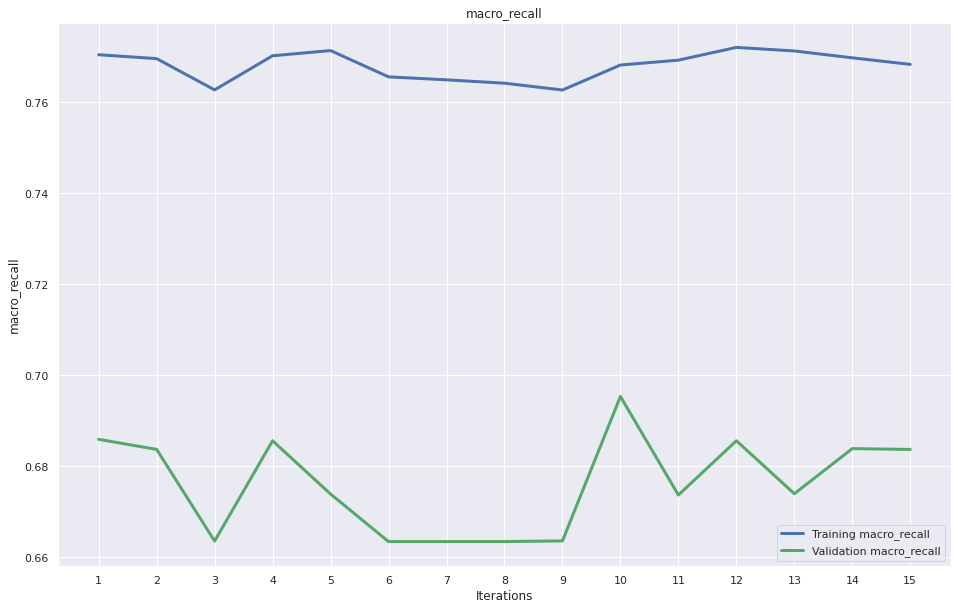

In [38]:
metrics = ['macro_recall']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

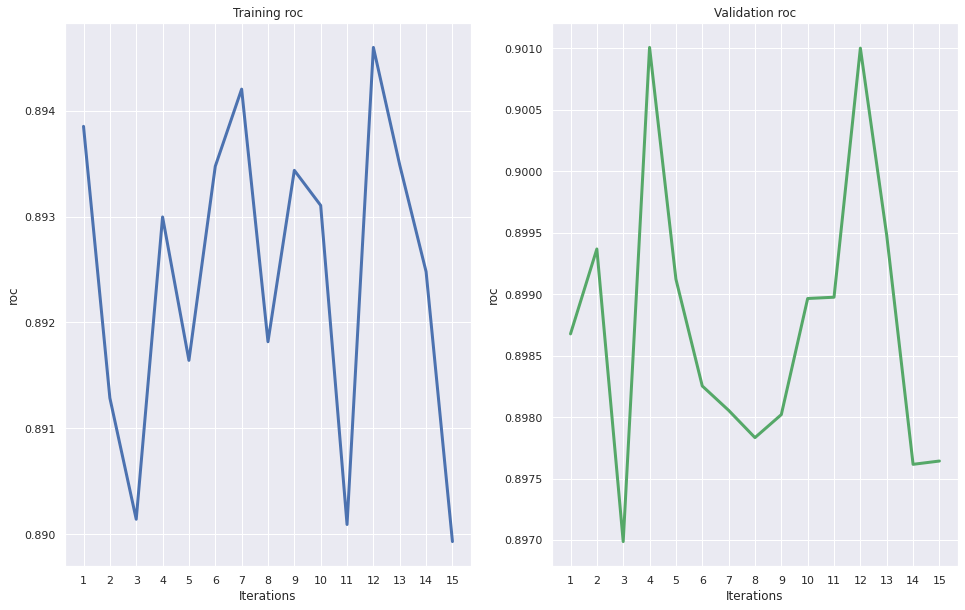

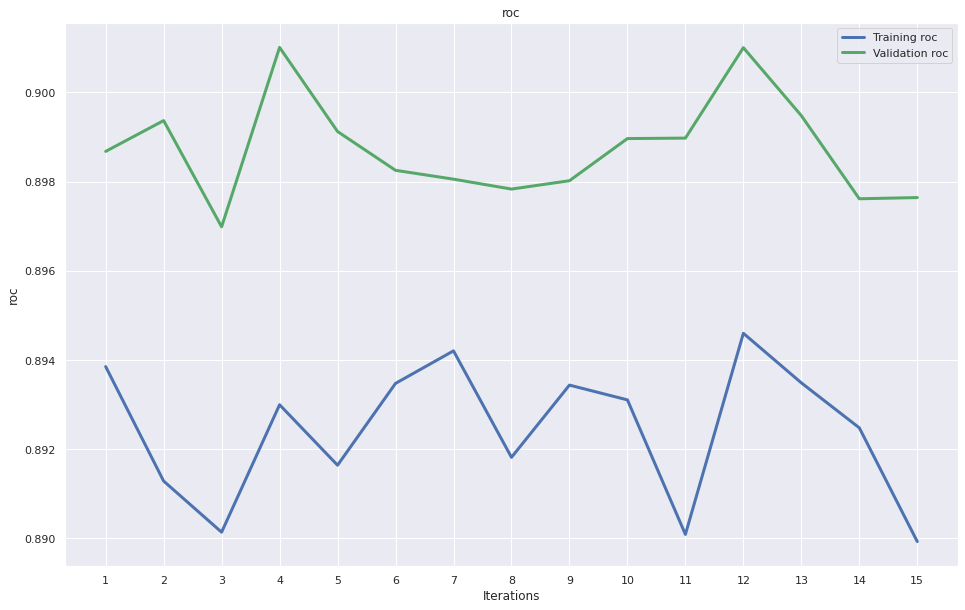

In [39]:
metrics = [ 'roc']
for metric in metrics:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    ax1.plot(iterations, result1, label="Training "+metric, linewidth=3)
    ax1.set_xticks(iterations)
    ax1.set_title('Training '+metric)
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel(metric)

    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    ax2.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    ax2.set_xticks(iterations)
    ax2.set_title('Validation '+metric)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel(metric)

    plt.figure(1)
    iterations = list(eval_train.keys())
    result1 = [eval_train[i][metric] for i in list(eval_train.keys())]
    result2 = [eval_test[i][metric] for i in list(eval_test.keys())]
    plt.figure(figsize=(16, 10))
    plt.xticks(iterations)
    plt.plot(iterations, result1, label="Training "+metric, linewidth=3)
    plt.plot(iterations, result2, label="Validation "+metric, linewidth=3, color='g')
    plt.legend()
    plt.title(metric)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.show()

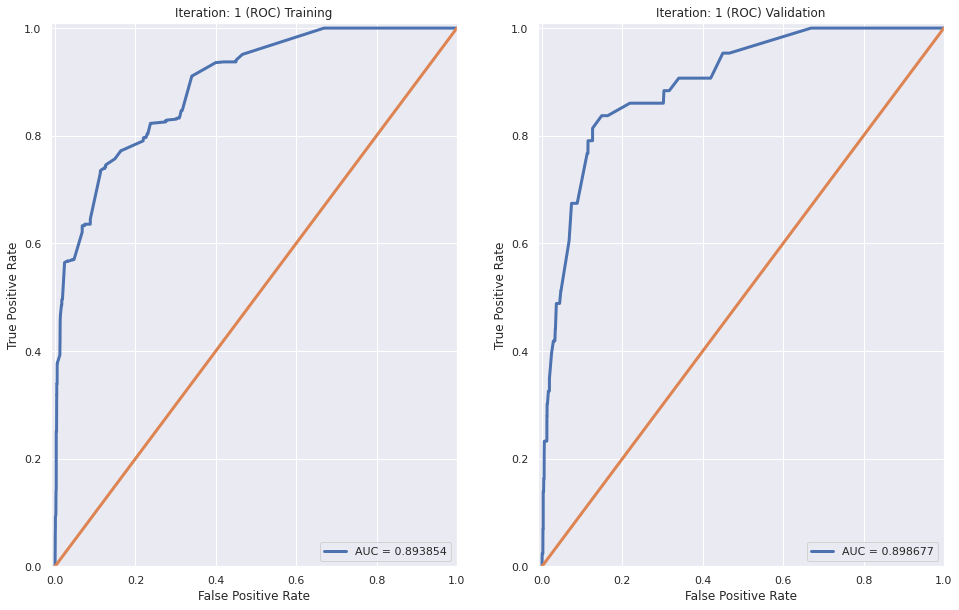

<Figure size 432x288 with 0 Axes>

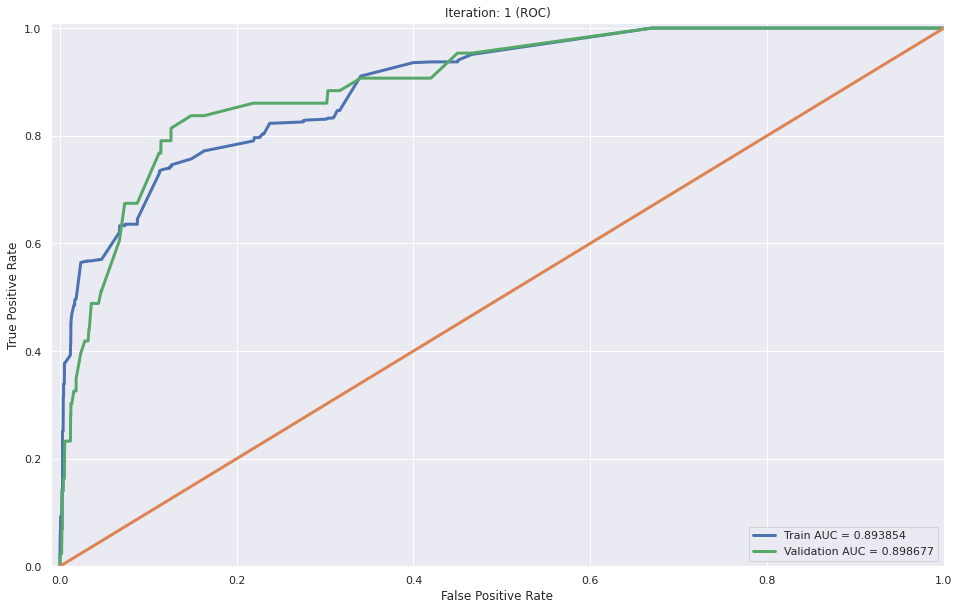

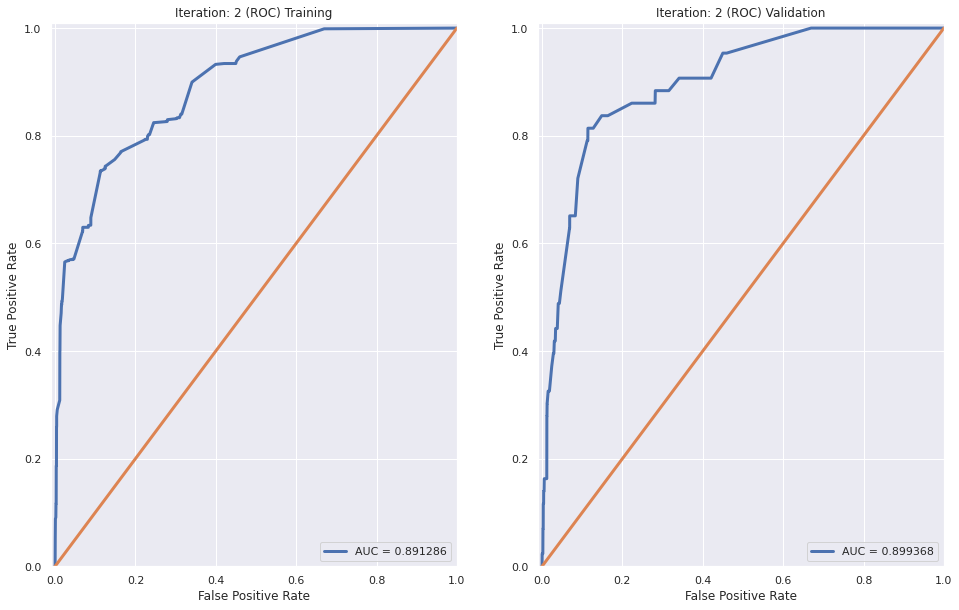

<Figure size 432x288 with 0 Axes>

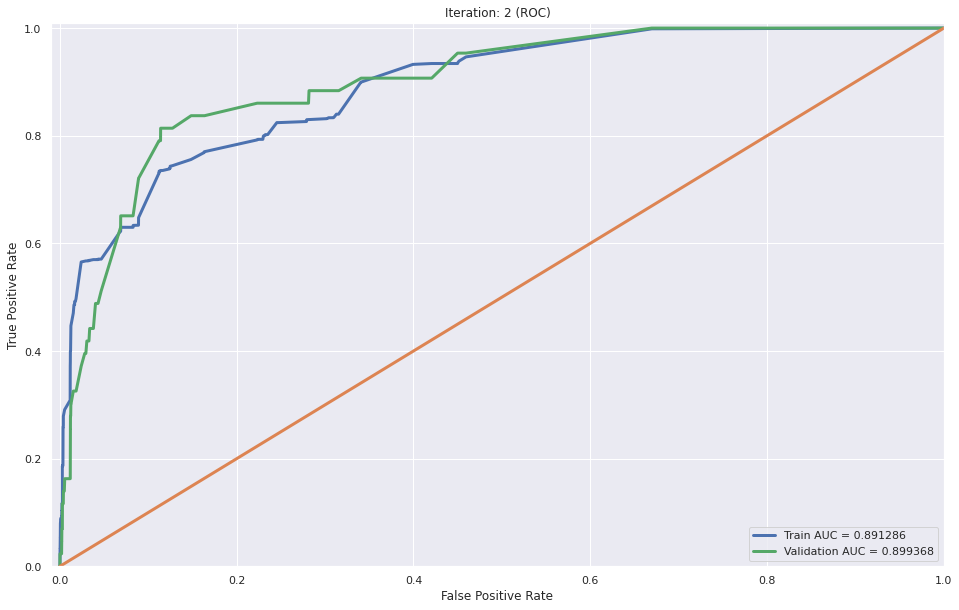

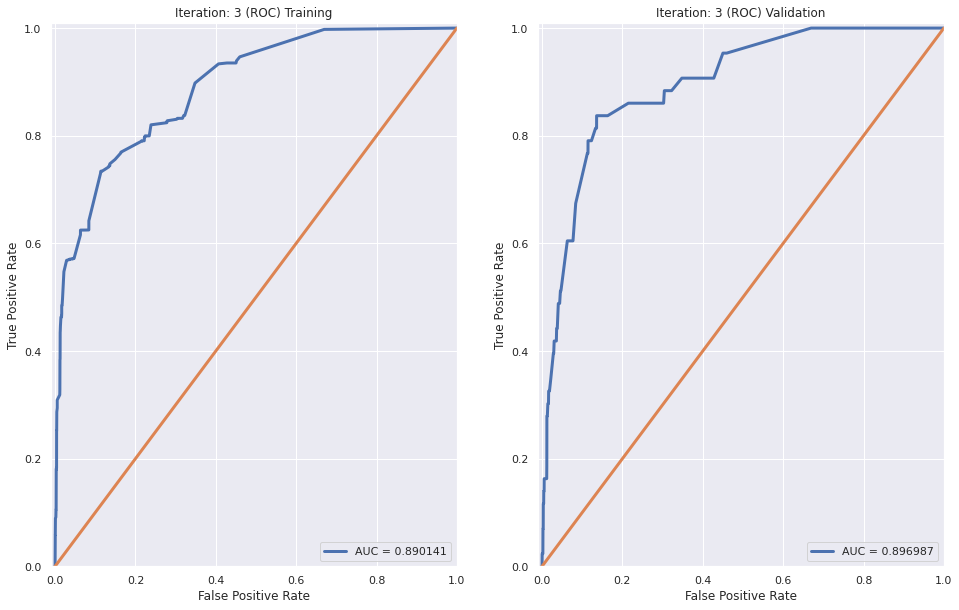

<Figure size 432x288 with 0 Axes>

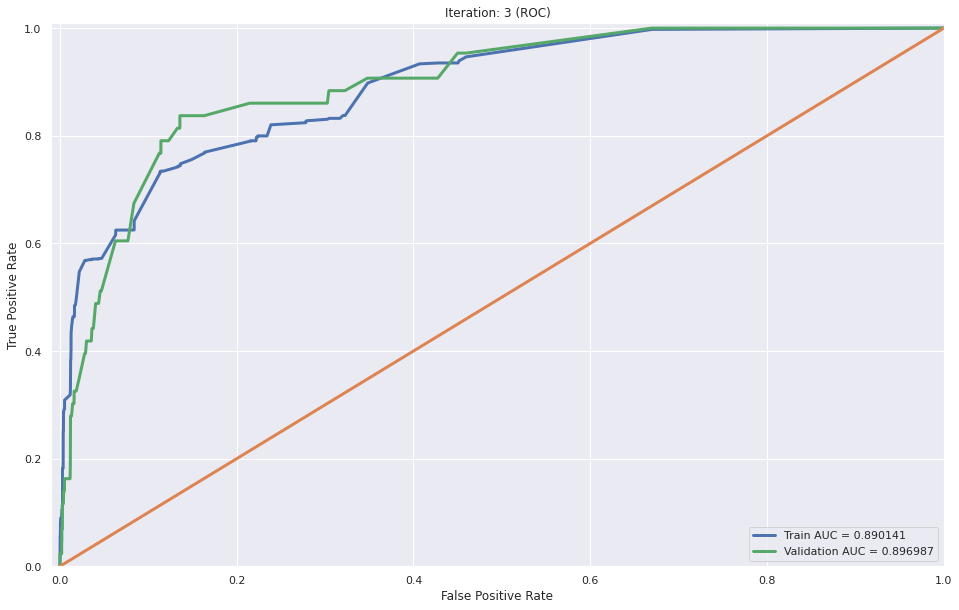

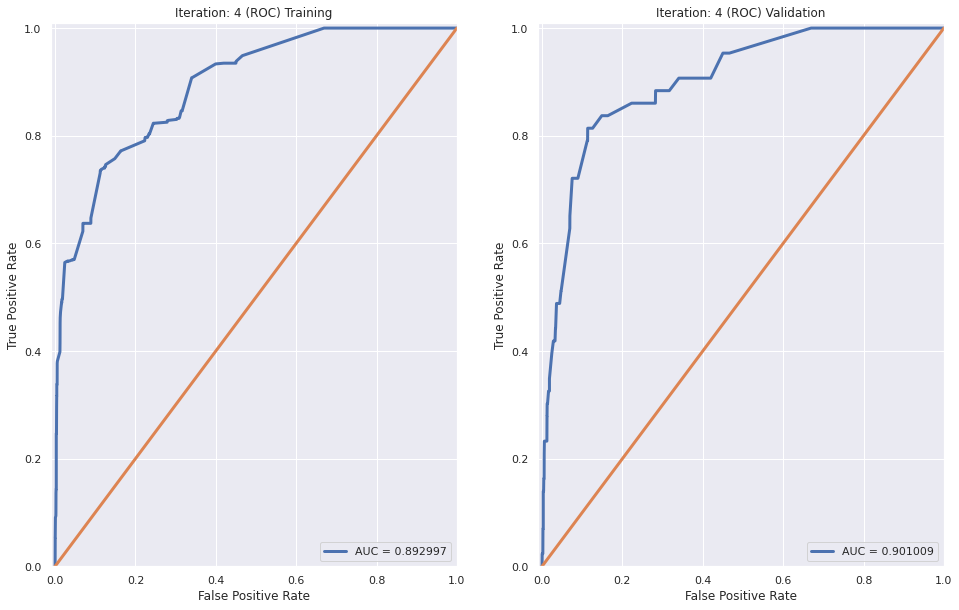

<Figure size 432x288 with 0 Axes>

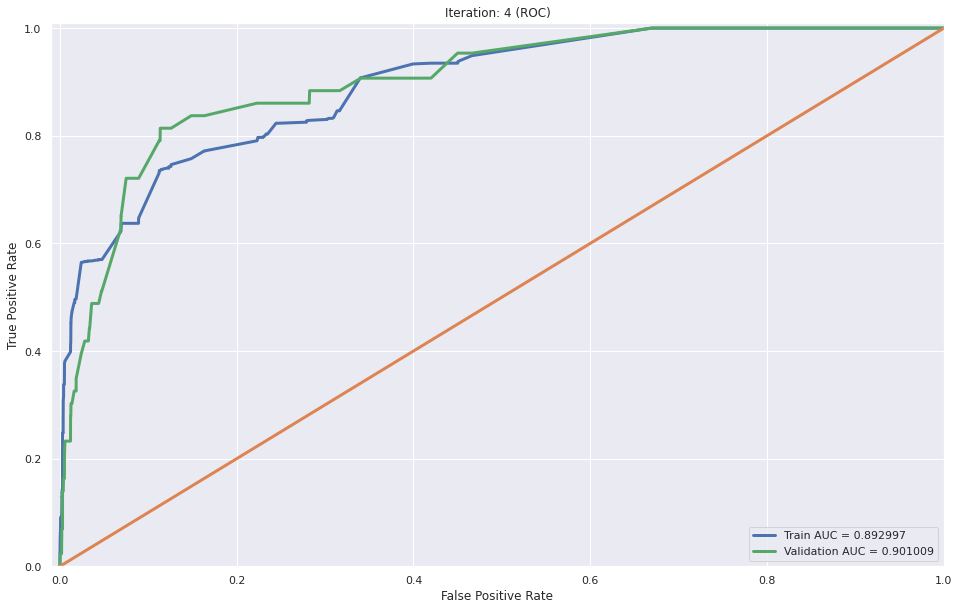

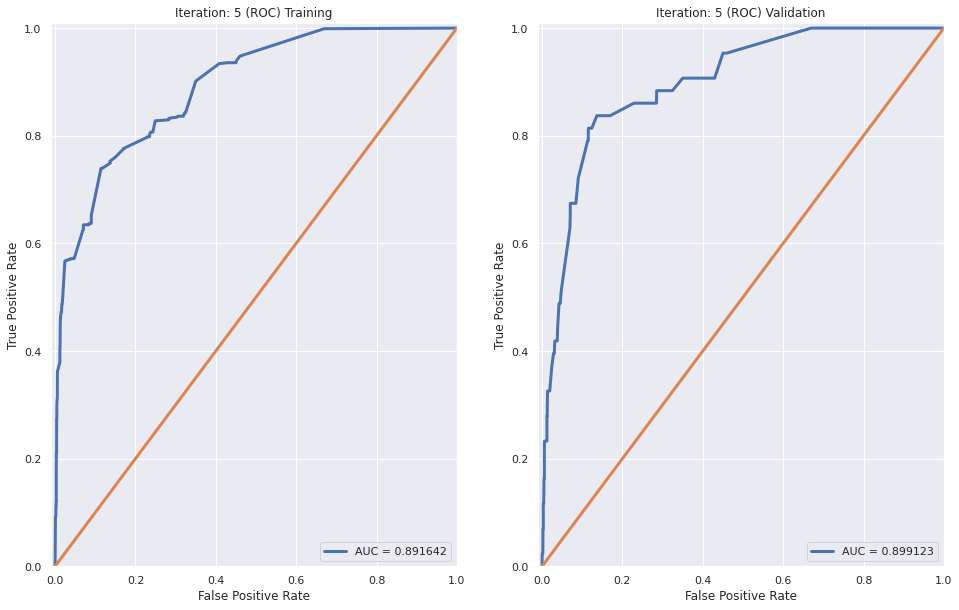

<Figure size 432x288 with 0 Axes>

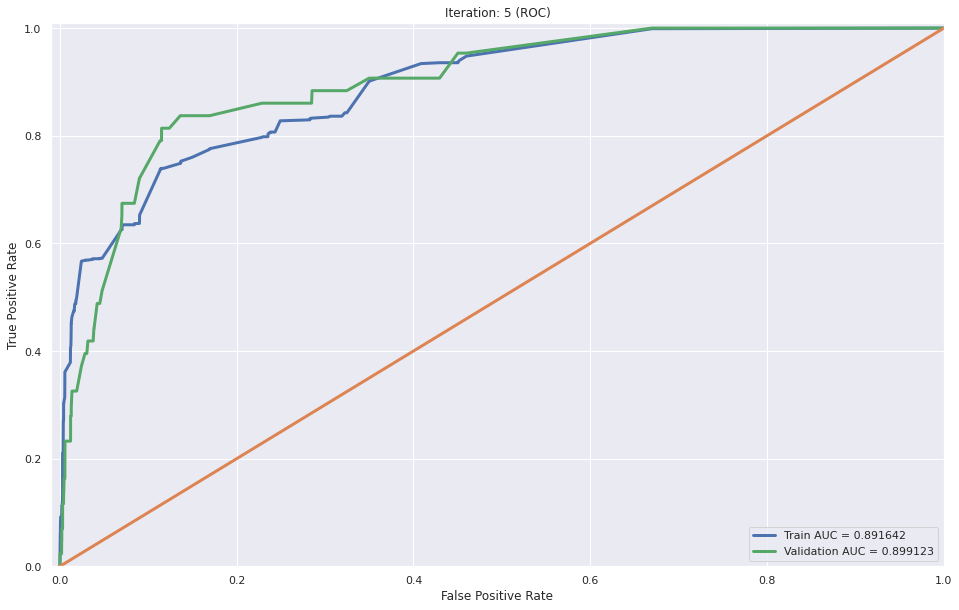

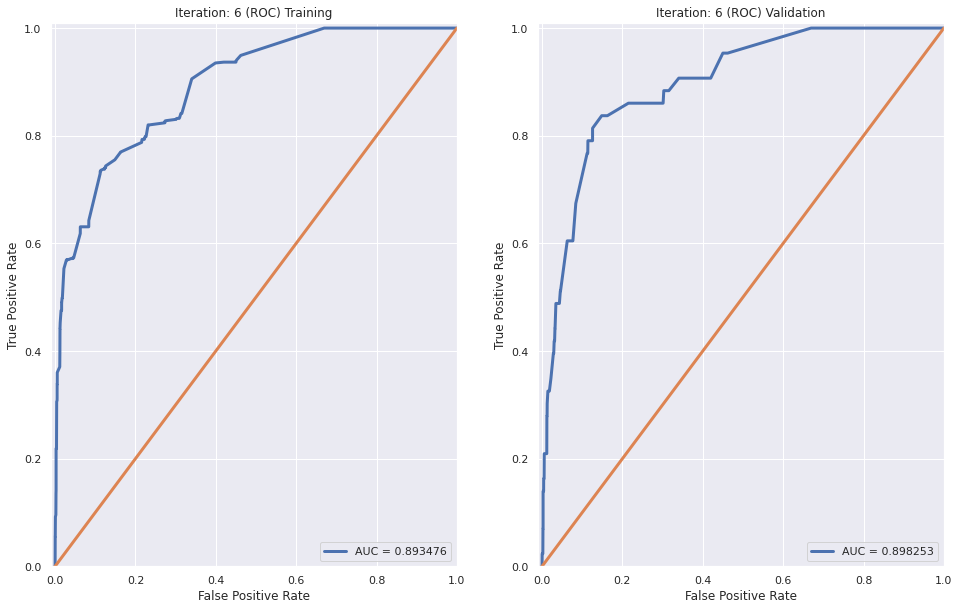

<Figure size 432x288 with 0 Axes>

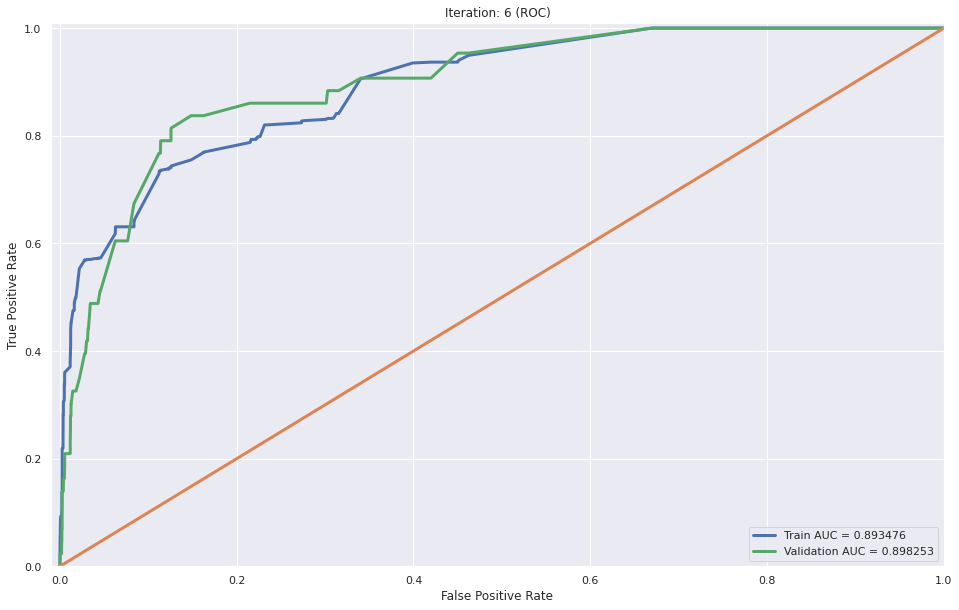

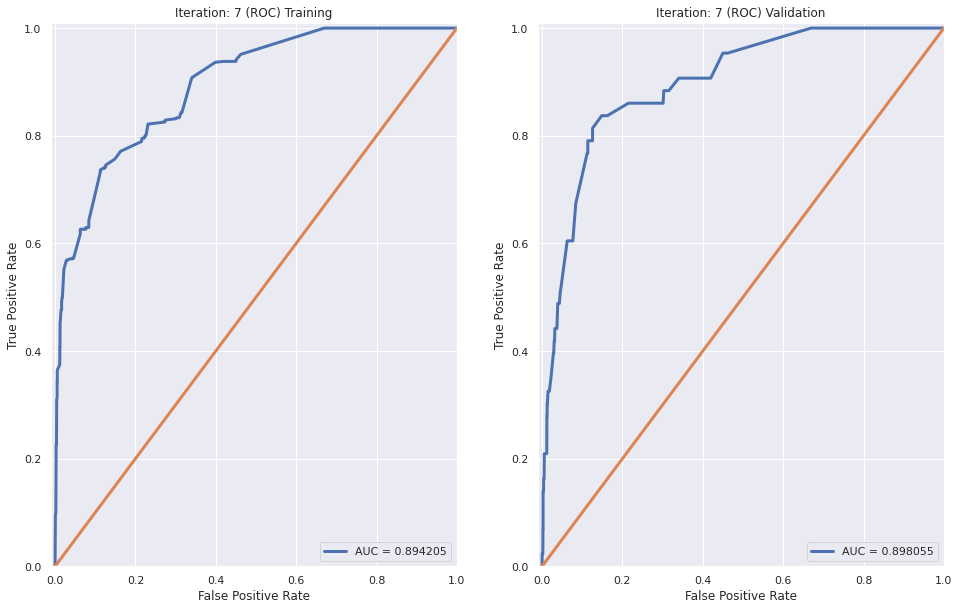

<Figure size 432x288 with 0 Axes>

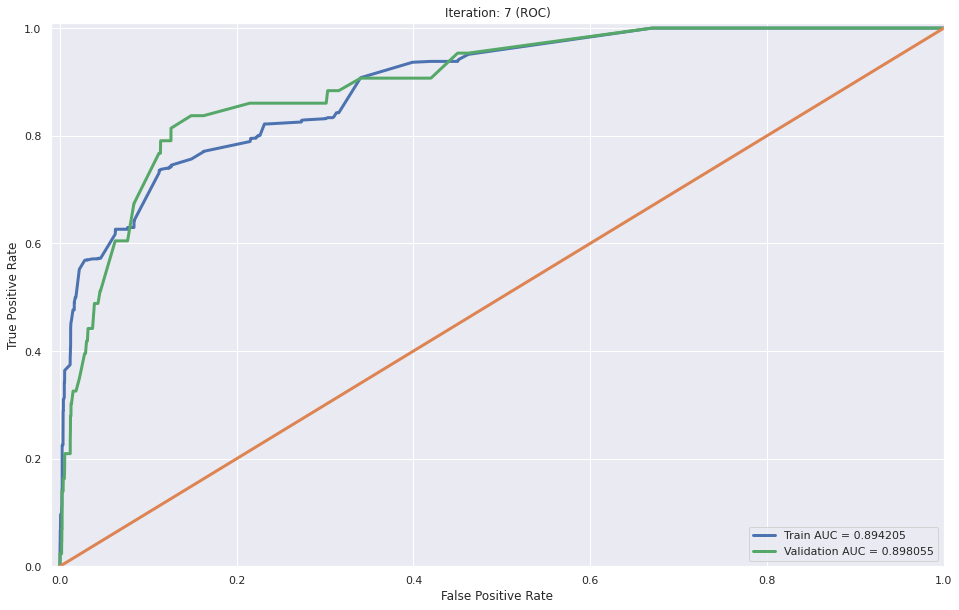

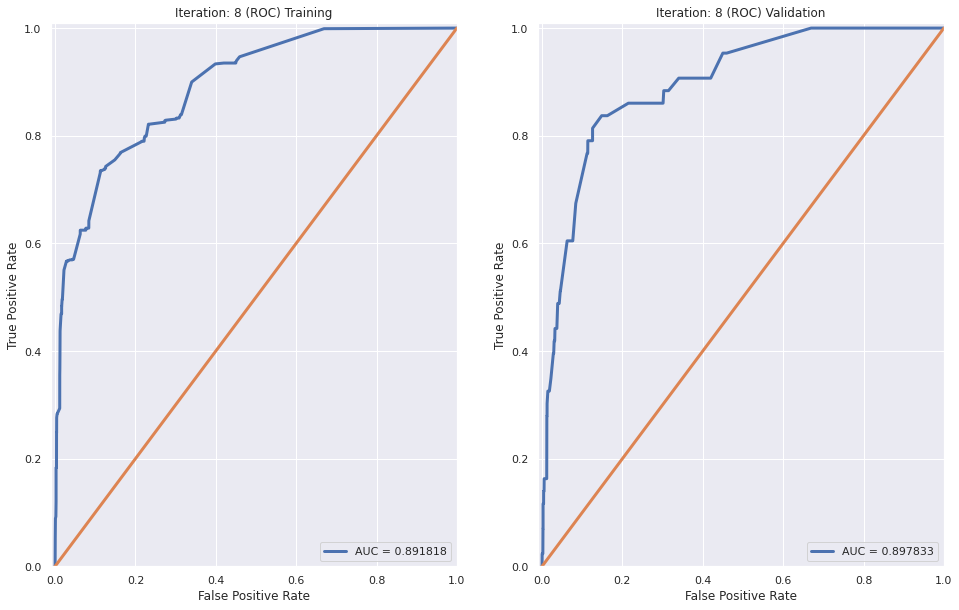

<Figure size 432x288 with 0 Axes>

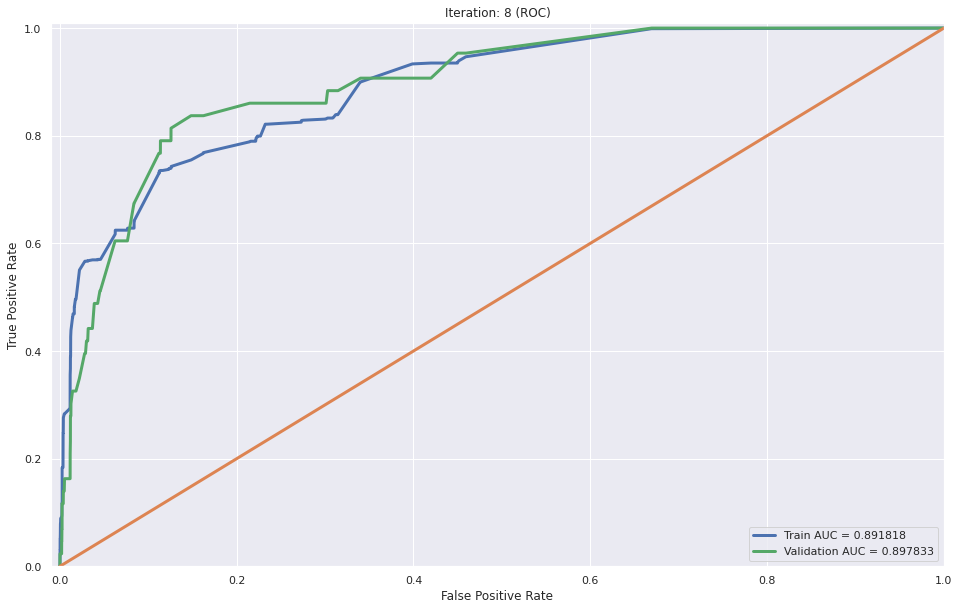

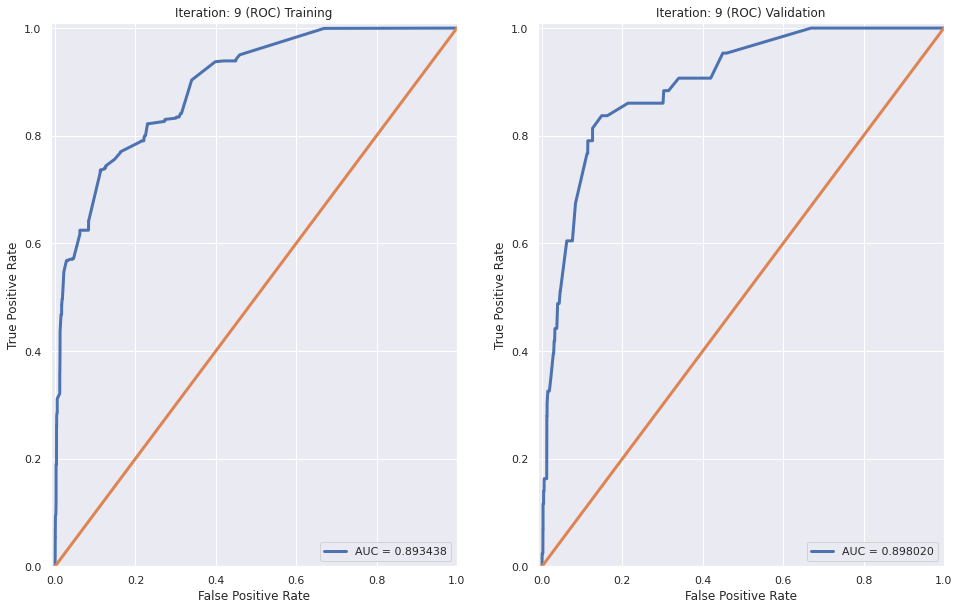

<Figure size 432x288 with 0 Axes>

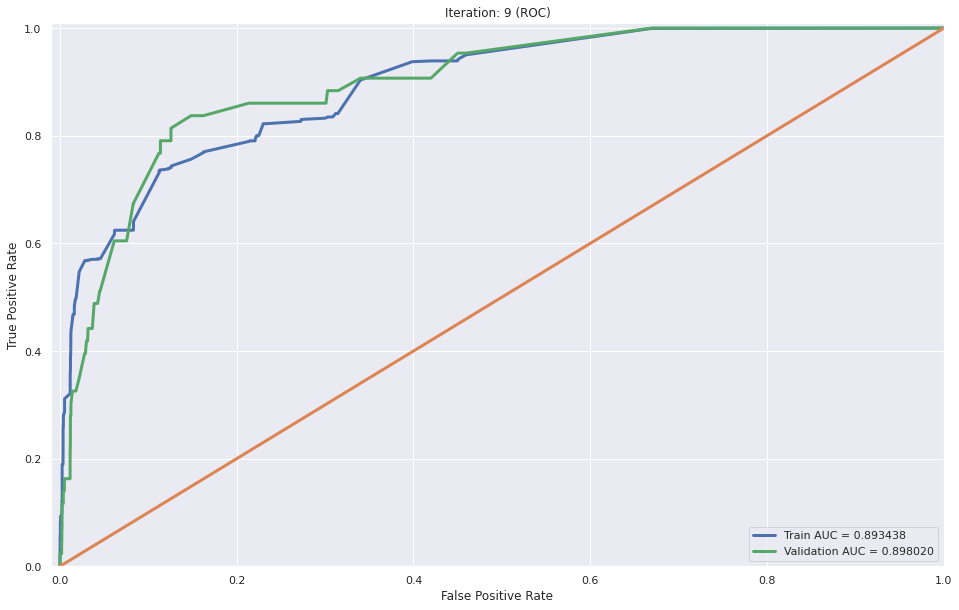

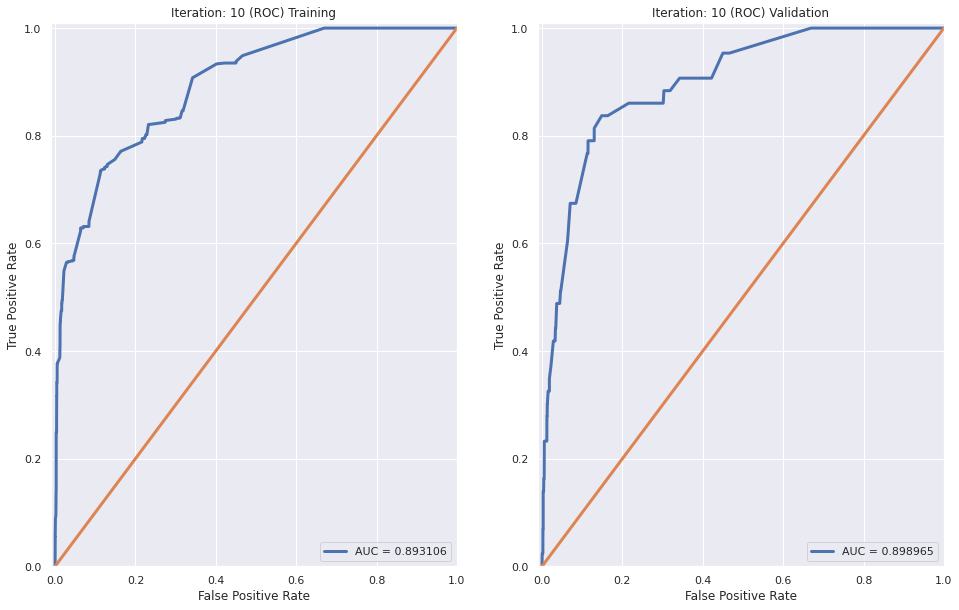

<Figure size 432x288 with 0 Axes>

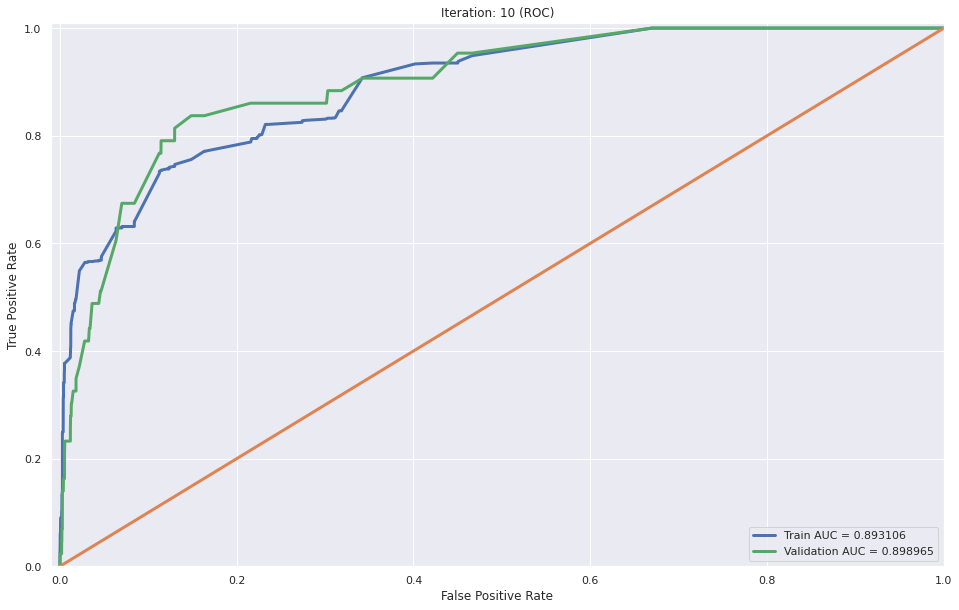

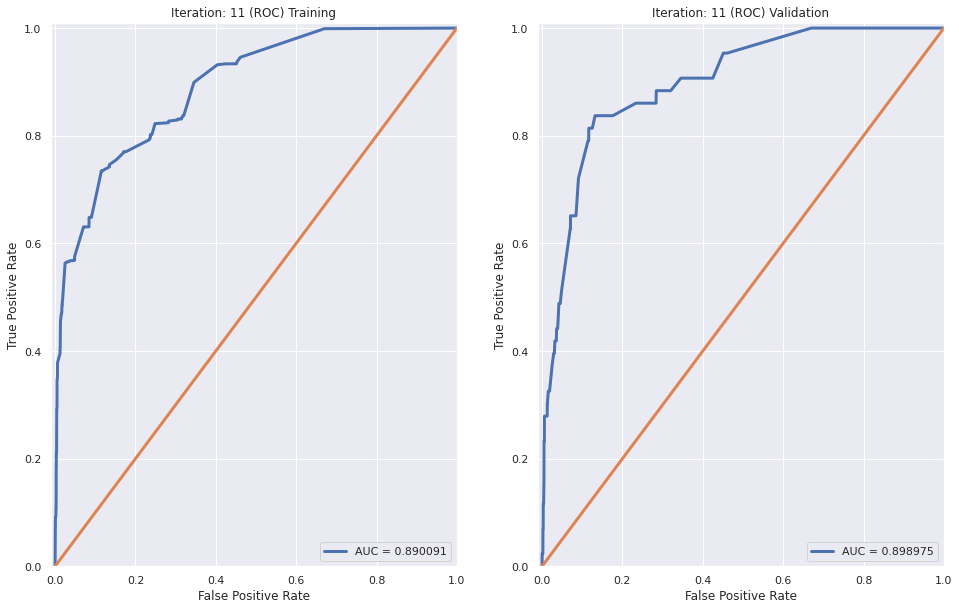

<Figure size 432x288 with 0 Axes>

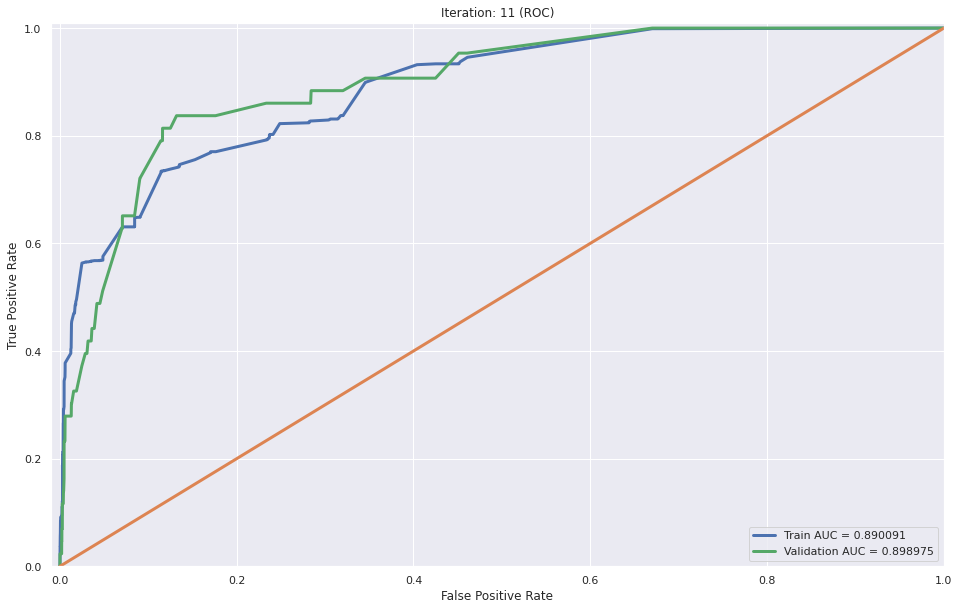

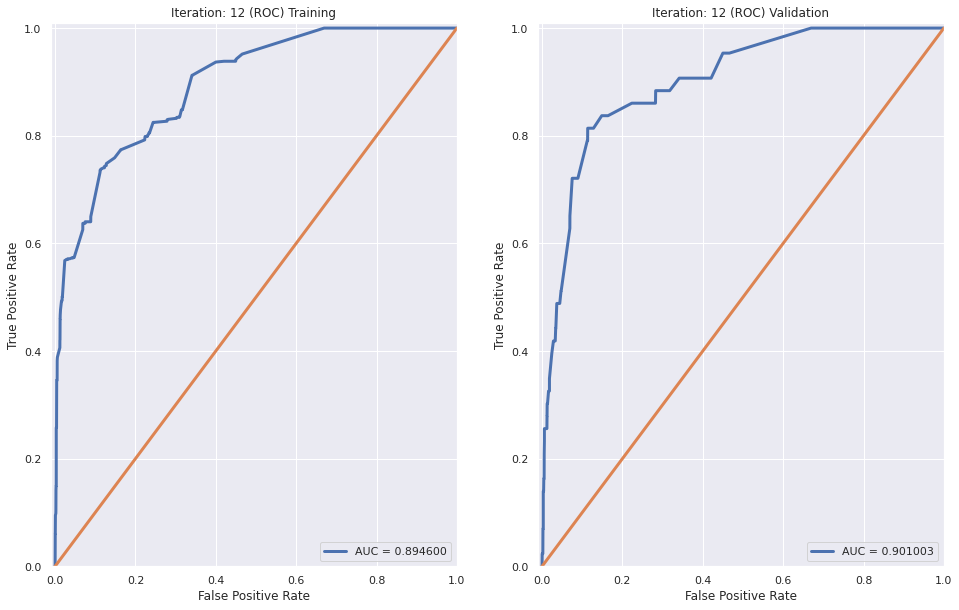

<Figure size 432x288 with 0 Axes>

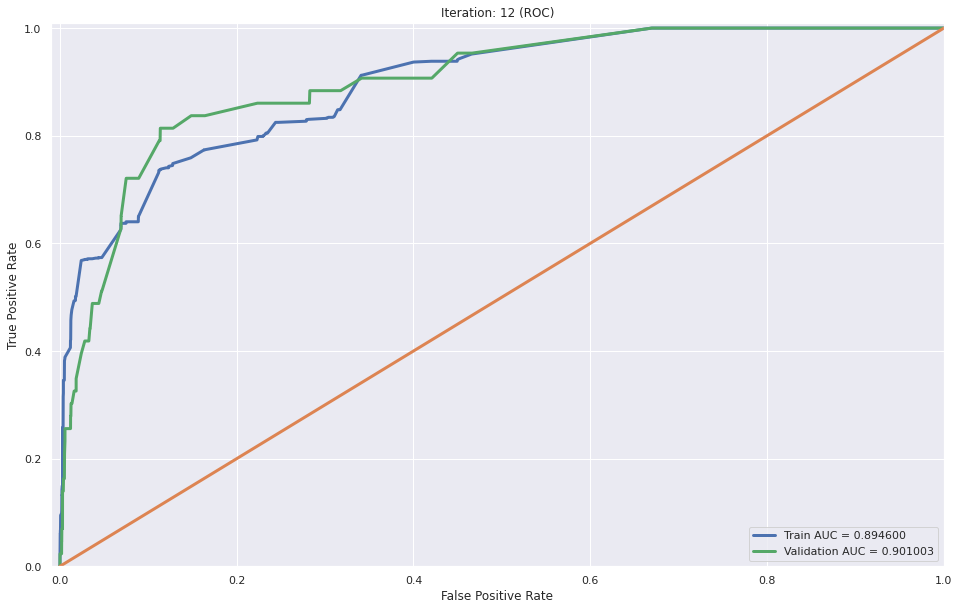

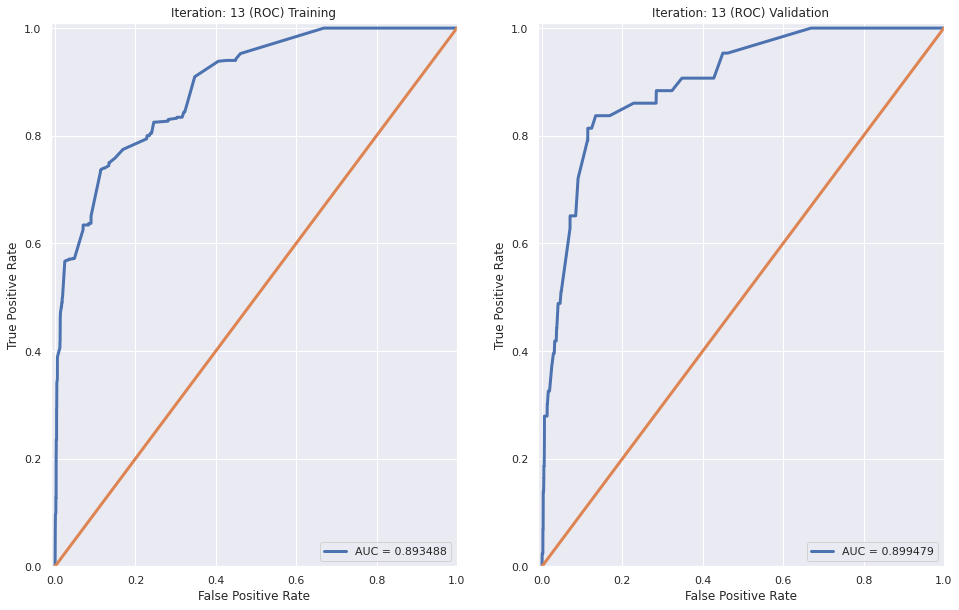

<Figure size 432x288 with 0 Axes>

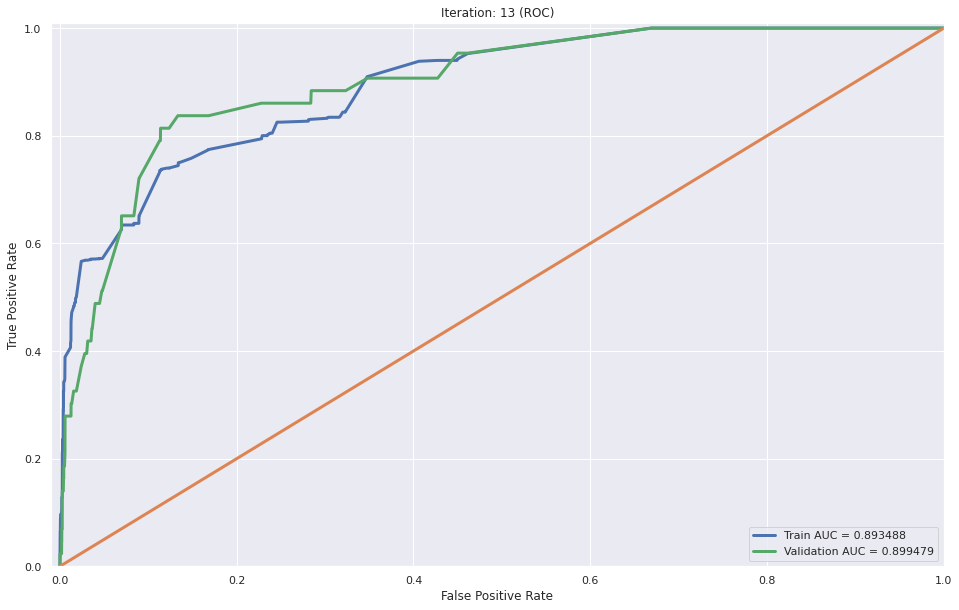

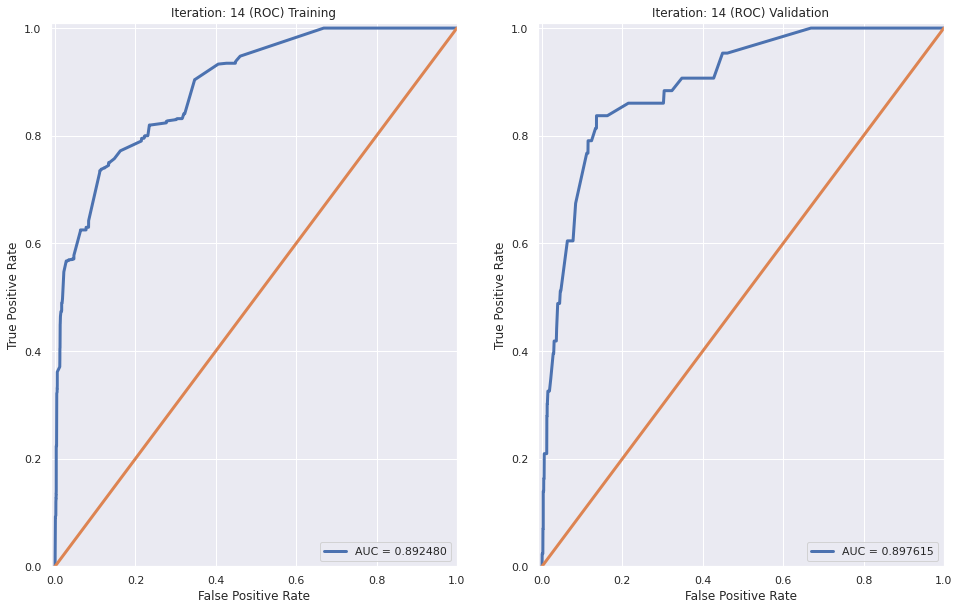

<Figure size 432x288 with 0 Axes>

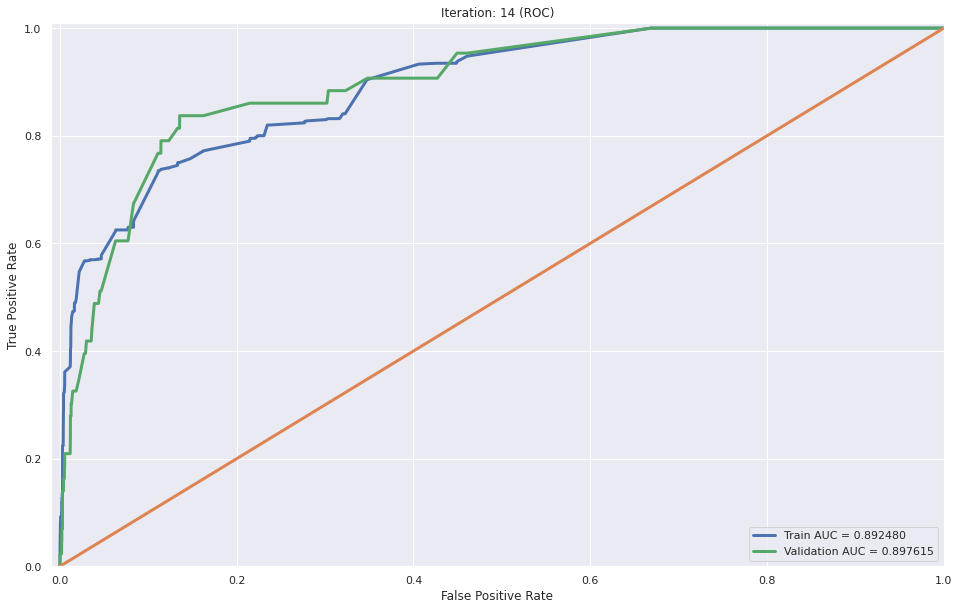

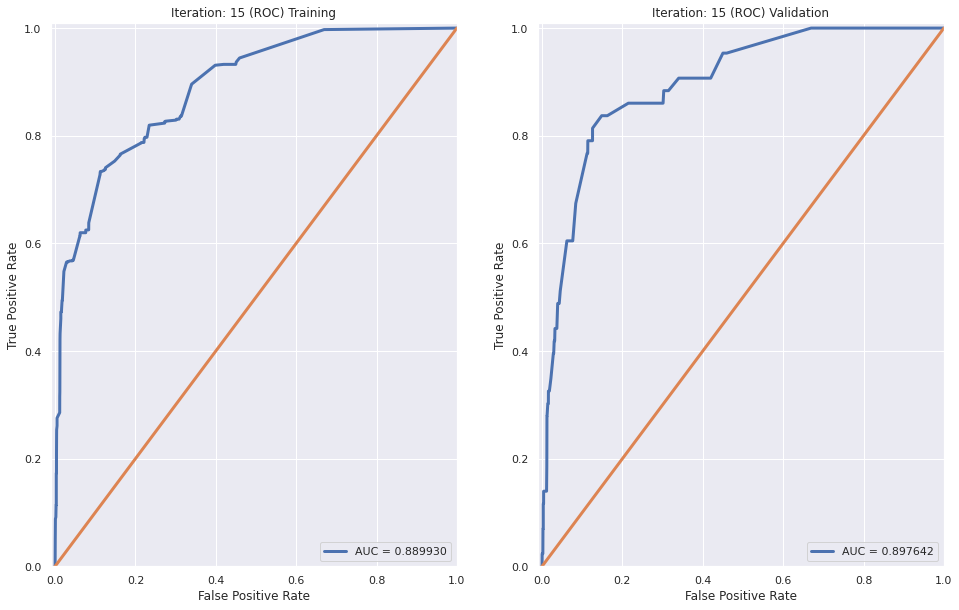

<Figure size 432x288 with 0 Axes>

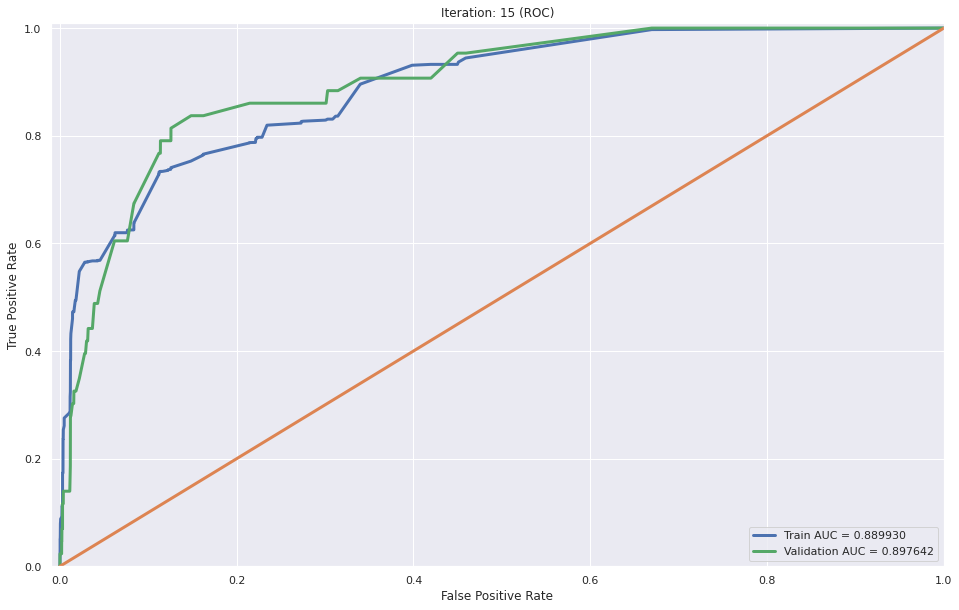

In [40]:
for it in iterations:
    false_pos_rate = eval_train[it]['false_pos_rate']
    true_pos_rate = eval_train[it]['true_pos_rate']
    roc_auc = auc(false_pos_rate, true_pos_rate)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

    ax1.plot(false_pos_rate, true_pos_rate, linewidth=3, label='AUC = %f'% roc_auc)
    ax1.plot([0,1],[0,1], linewidth=3)

    ax1.set_xlim([-0.01, 1])
    ax1.set_ylim([0, 1.01])
    ax1.legend(loc='lower right')
    ax1.set_title('Iteration: '+ str(it) +' (ROC) Training')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_xlabel('False Positive Rate')


    test_false_pos_rate = eval_test[it]['false_pos_rate']
    test_true_pos_rate = eval_test[it]['true_pos_rate']
    test_roc_auc = auc(test_false_pos_rate, test_true_pos_rate)

    ax2.plot(test_false_pos_rate, test_true_pos_rate, linewidth=3, label='AUC = %f'% test_roc_auc)
    ax2.plot([0,1],[0,1], linewidth=3)

    ax2.set_xlim([-0.01, 1])
    ax2.set_ylim([0, 1.01])
    ax2.legend(loc='lower right')
    ax2.set_title('Iteration: '+ str(it) +' (ROC) Validation')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_xlabel('False Positive Rate')

    plt.figure(2)
    false_pos_rate = eval_train[it]['false_pos_rate']
    true_pos_rate = eval_train[it]['true_pos_rate']
    roc_auc = auc(false_pos_rate, true_pos_rate)

    test_false_pos_rate = eval_test[it]['false_pos_rate']
    test_true_pos_rate = eval_test[it]['true_pos_rate']
    test_roc_auc = auc(test_false_pos_rate, test_true_pos_rate)

    plt.figure(figsize=(16, 10))
    plt.plot(false_pos_rate, true_pos_rate, linewidth=3, label='Train AUC = %f'% roc_auc)
    plt.plot(test_false_pos_rate, test_true_pos_rate, linewidth=3, label='Validation AUC = %f'% test_roc_auc, color='g')
    plt.plot([0,1],[0,1], linewidth=3)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])

    plt.legend(loc='lower right')
    plt.title('Iteration: '+ str(it) +' (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [26]:
# for it in iterations:
#     precision_rt = training_evaluations[it]['precision_rt']
#     recall_rt = training_evaluations[it]['recall_rt']
#     threshold_rate = training_evaluations[it]['threshold_rt']

#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

#     ax1.plot(threshold_rate, precision_rt[1:], label="Precision",linewidth=3)
#     ax1.plot(threshold_rate, recall_rt[1:], label="Recall",linewidth=3)
#     #     ax1.set_yscale('log')
#     ax1.legend()
#     ax1.set_title('Iteration: '+ str(it) +' Precision Vs Recall Training')
#     ax1.set_ylabel('Precision/Recall')
#     ax1.set_xlabel('Threshold')


#     precision_rt = test_evaluations[it]['precision_rt']
#     recall_rt = test_evaluations[it]['recall_rt']
#     threshold_rate = test_evaluations[it]['threshold_rt']
#     ax2.plot(threshold_rate, precision_rt[1:], label="Precision",linewidth=3)
#     ax2.plot(threshold_rate, recall_rt[1:], label="Recall",linewidth=3)
#     ax2.legend()
#     ax2.set_yscale('log')
#     ax2.set_title('Iteration: '+ str(it) +' Precision Vs Recall Validation')
#     ax2.set_ylabel('Precision/Recall')
#     ax2.set_xlabel('Threshold')

Confusion Matrix

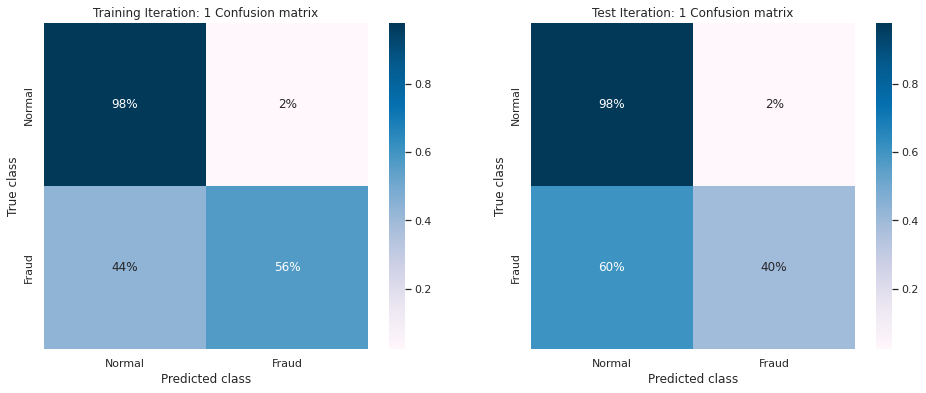

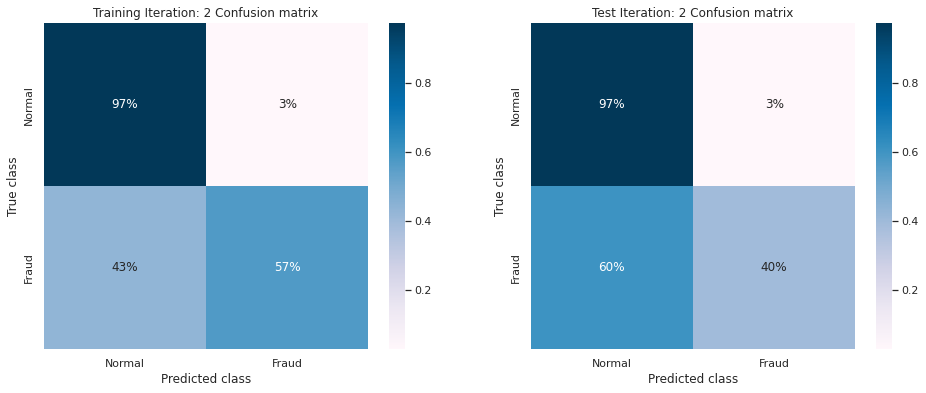

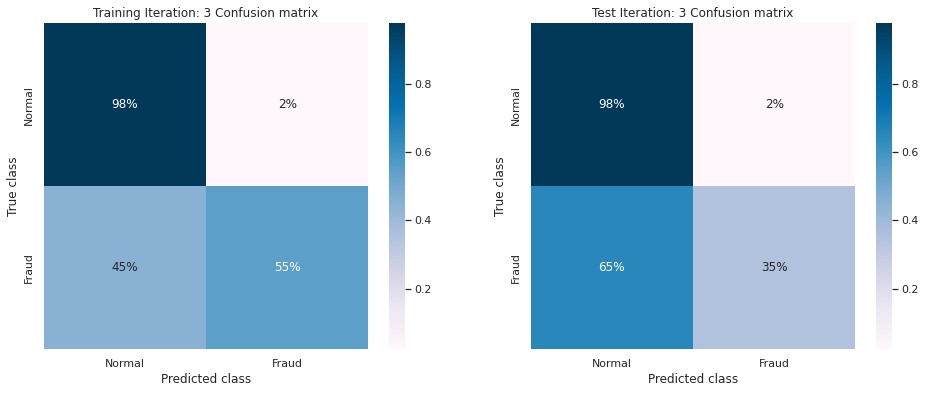

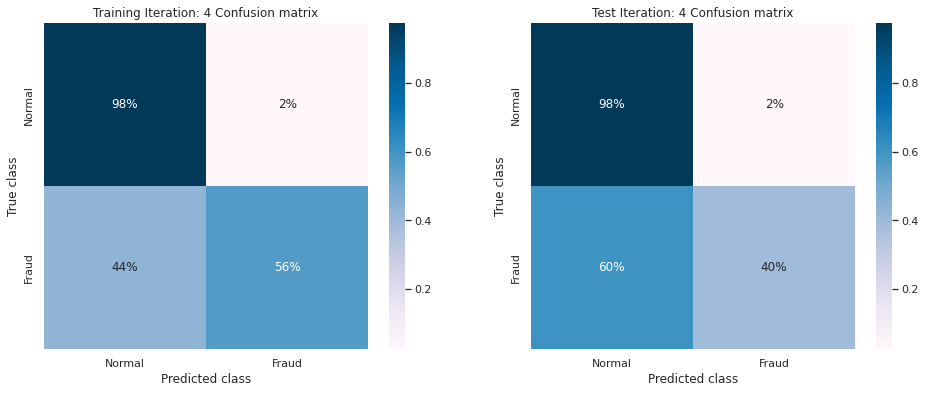

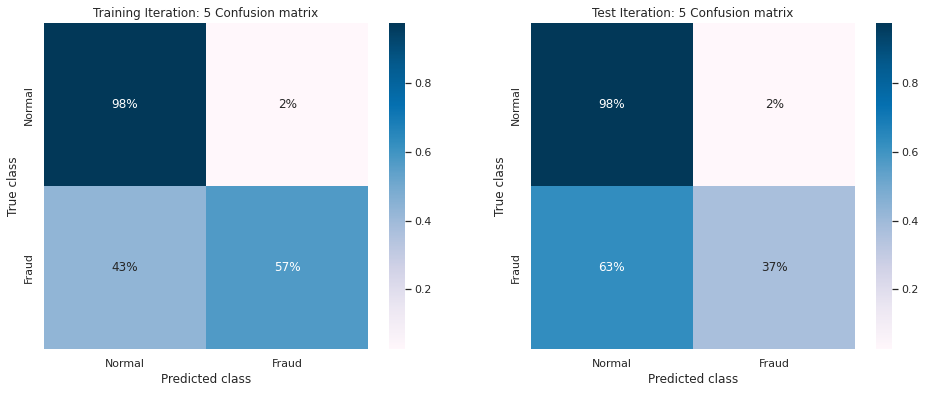

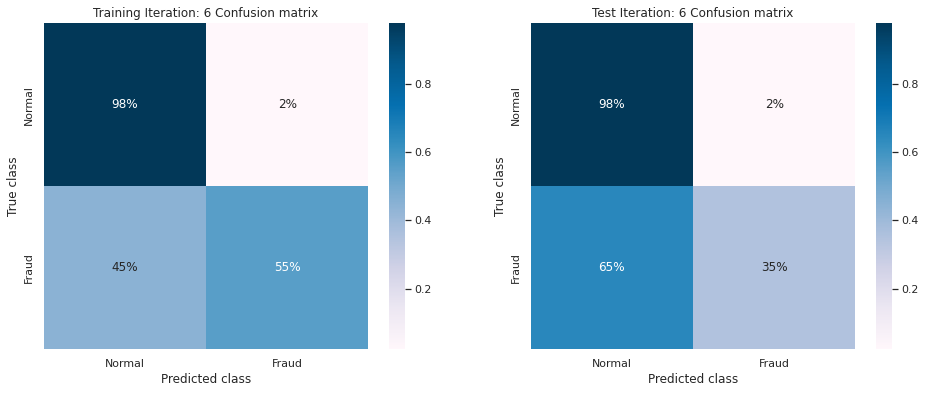

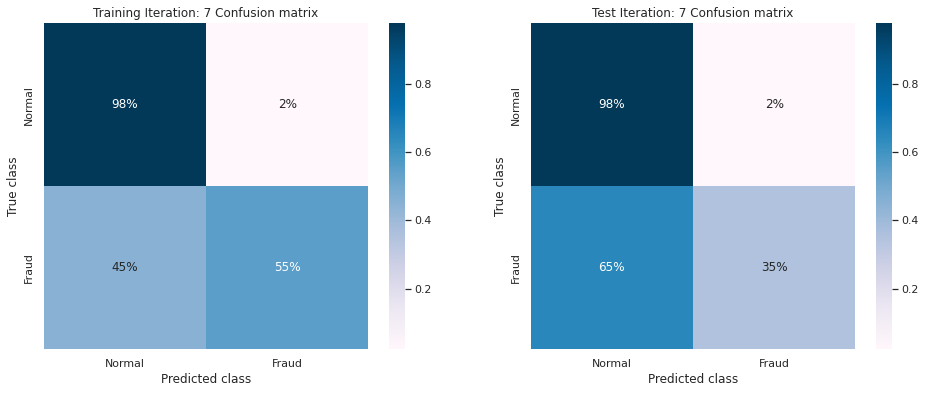

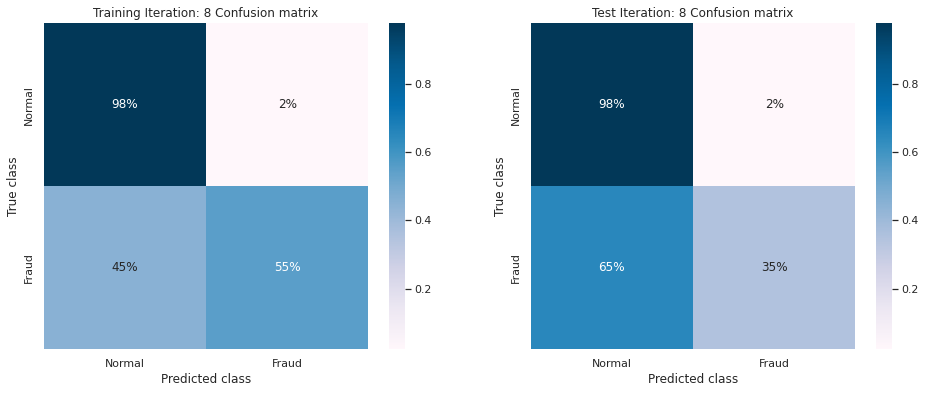

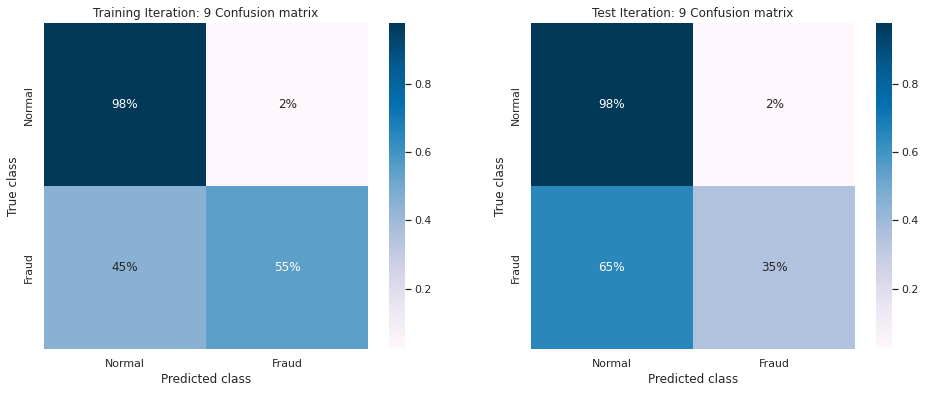

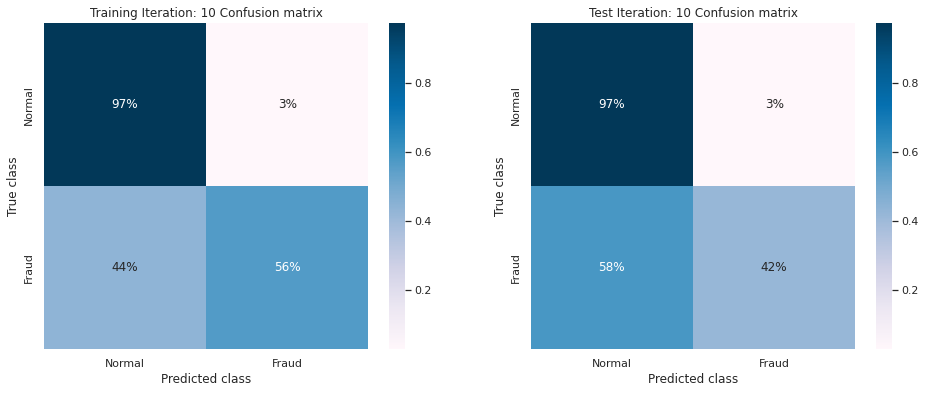

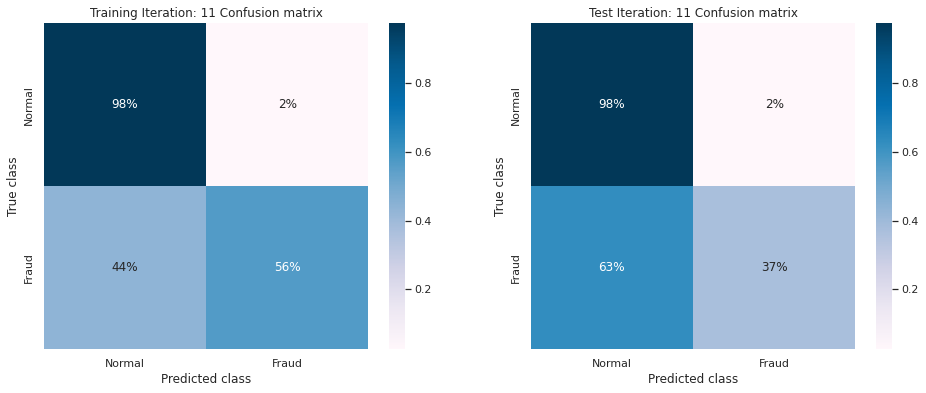

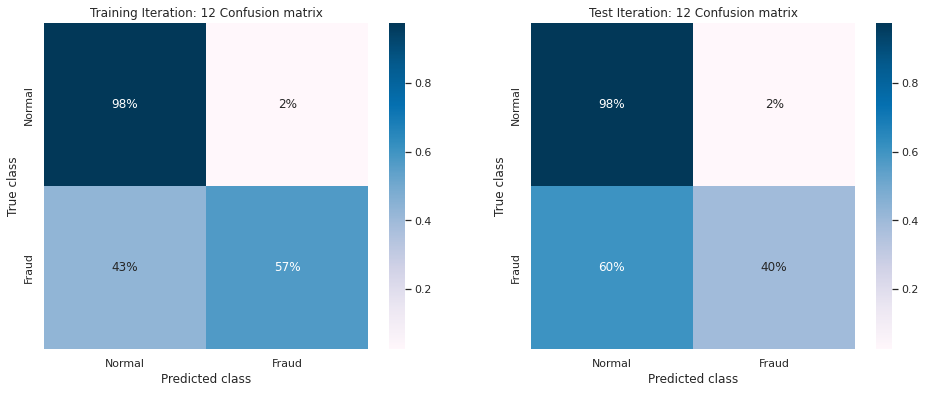

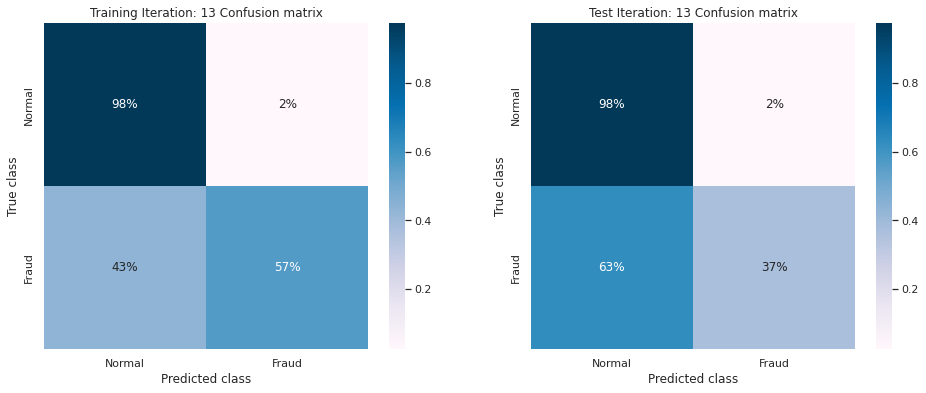

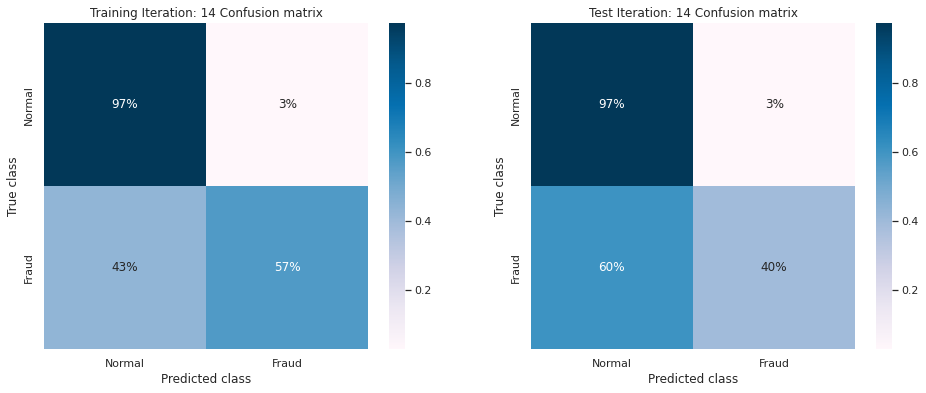

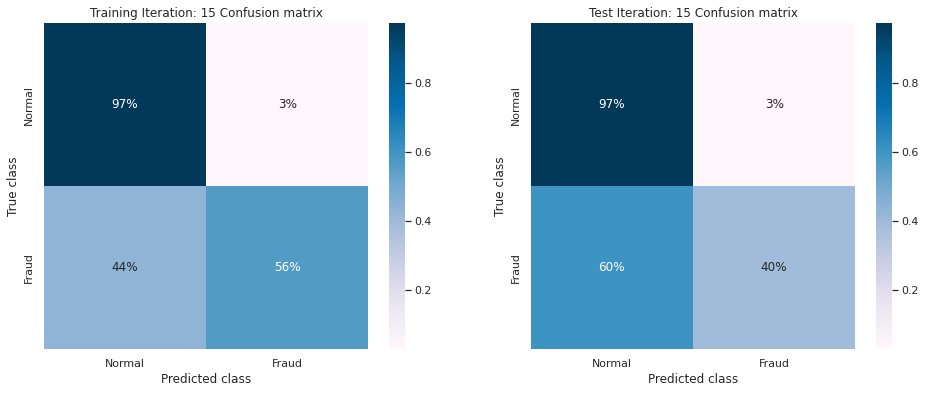

In [41]:
def conf_matrix_percent(conf_matrix_train, conf_matrix_test, iteration):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    LABELS = ["Normal", "Fraud"]
    #Confusion Matrix Visual)
    conf_matrix_train = conf_matrix_train.astype('float') / (conf_matrix_train.sum(axis=1)[:, np.newaxis])
    sns.heatmap(conf_matrix_train, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt=".0%", annot_kws={"size": 12}, ax=ax1, cmap="PuBu")
    ax1.set_title("Training Iteration: "+str(iteration)+" Confusion matrix")
    ax1.set_ylabel('True class')
    ax1.set_xlabel('Predicted class')

    conf_matrix_test = conf_matrix_test.astype('float') / (conf_matrix_test.sum(axis=1)[:, np.newaxis])
    sns.heatmap(conf_matrix_test, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt=".0%", annot_kws={"size": 12}, ax=ax2, cmap="PuBu")
    ax2.set_title("Test Iteration: "+str(iteration)+" Confusion matrix")
    ax2.set_ylabel('True class')
    ax2.set_xlabel('Predicted class')


for it in iterations:
    cnf_mtx_train = eval_train[it]['conf_matrix']
    cnf_mtx_test = eval_test[it]['conf_matrix']
    conf_matrix_percent(cnf_mtx_train, cnf_mtx_test, it)

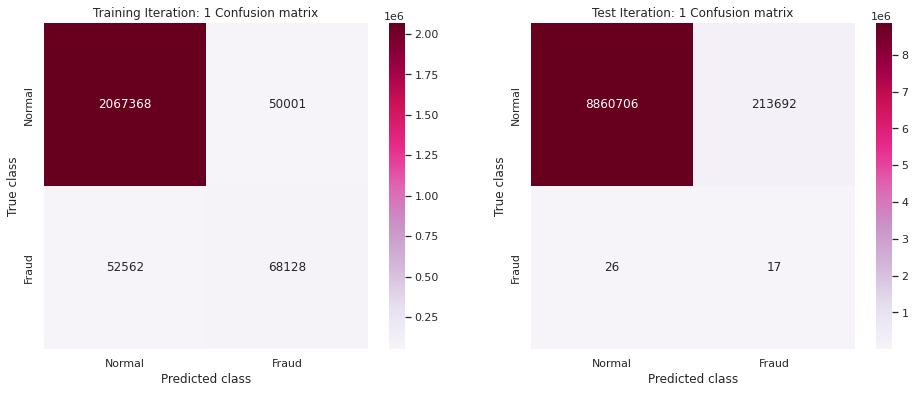

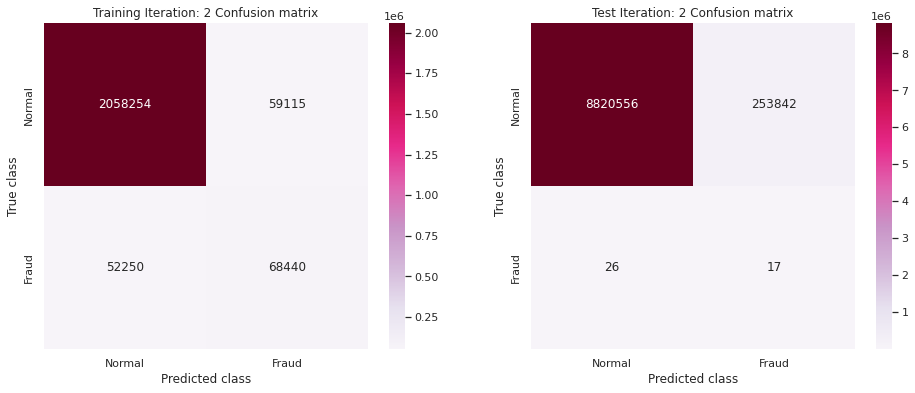

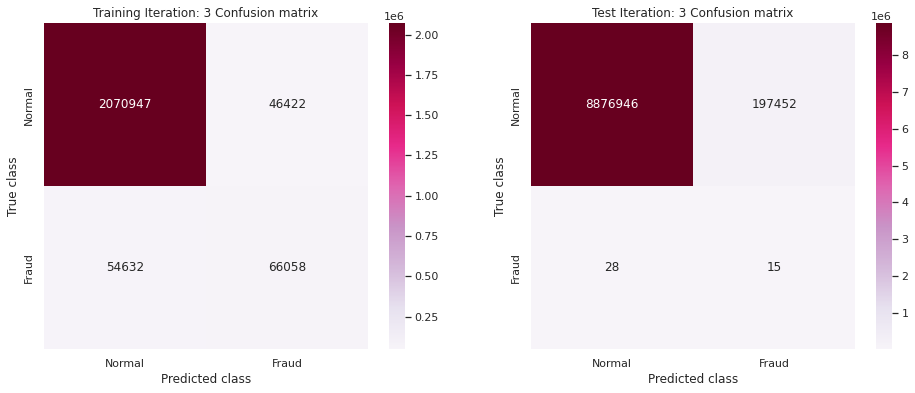

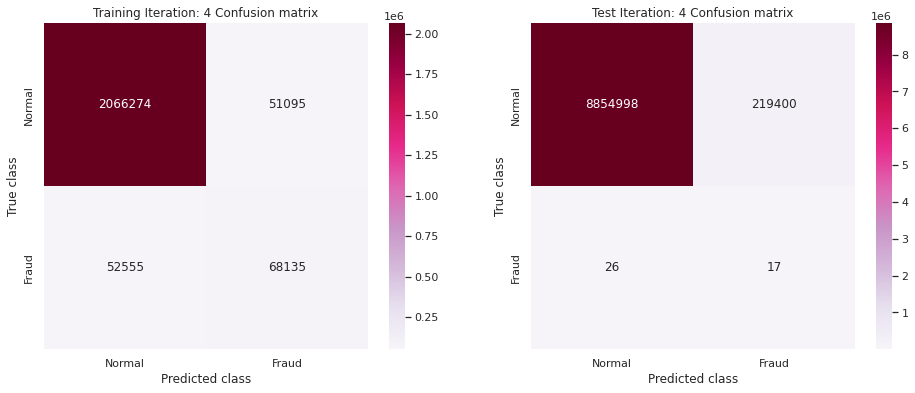

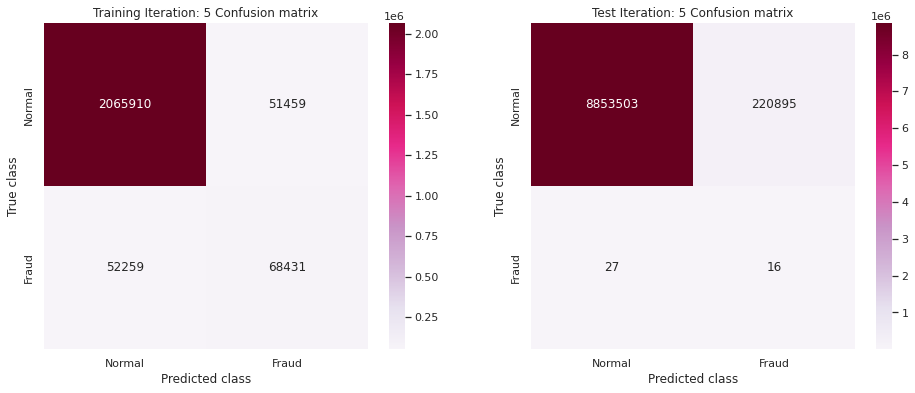

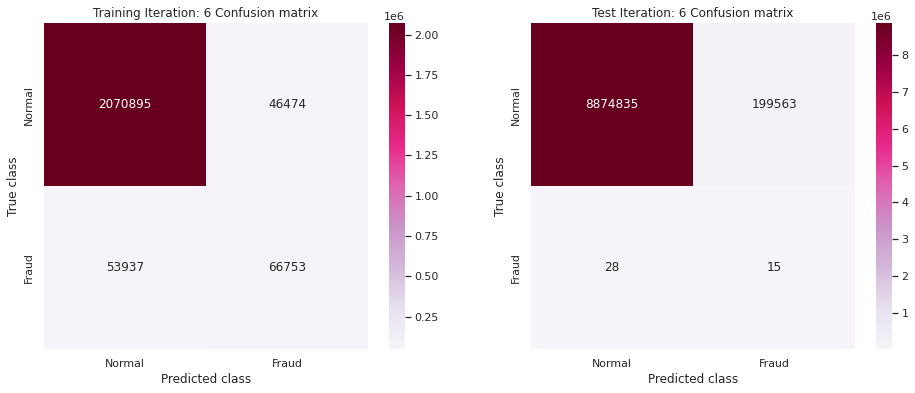

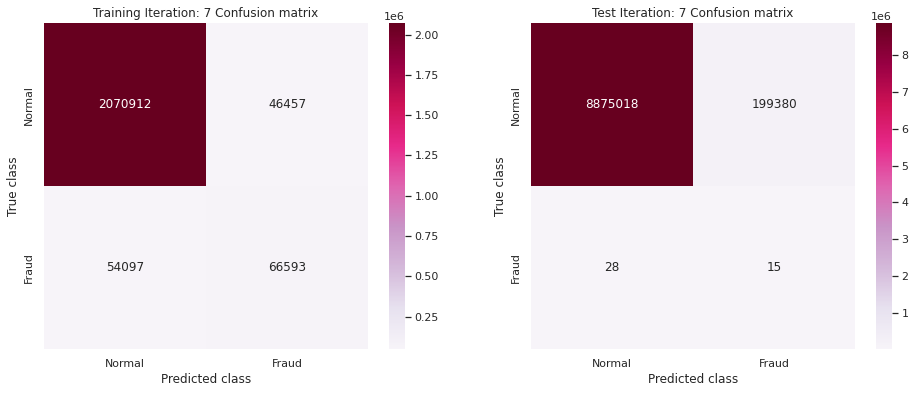

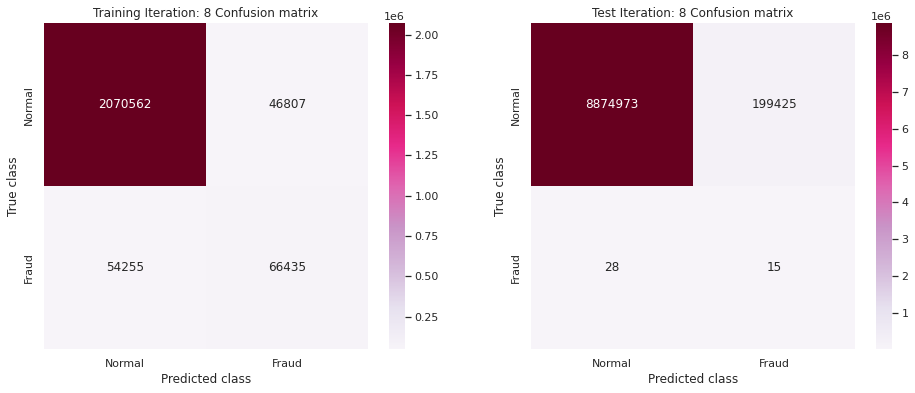

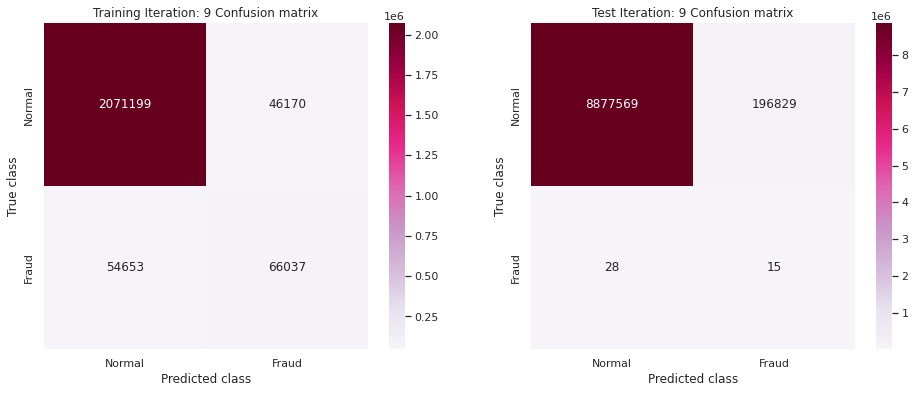

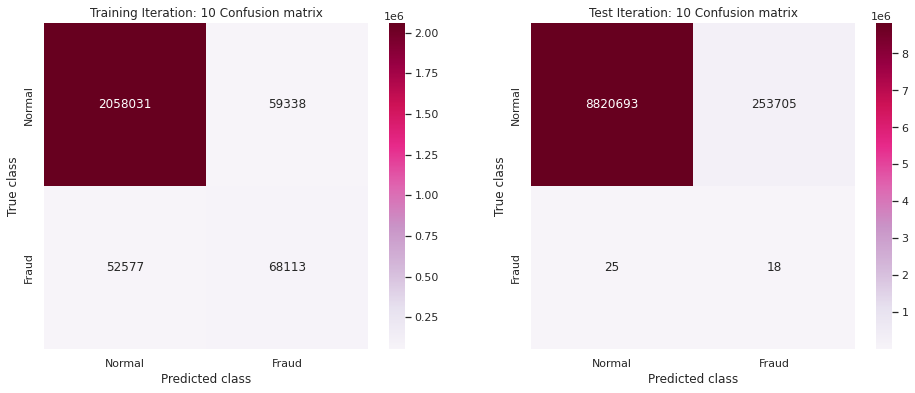

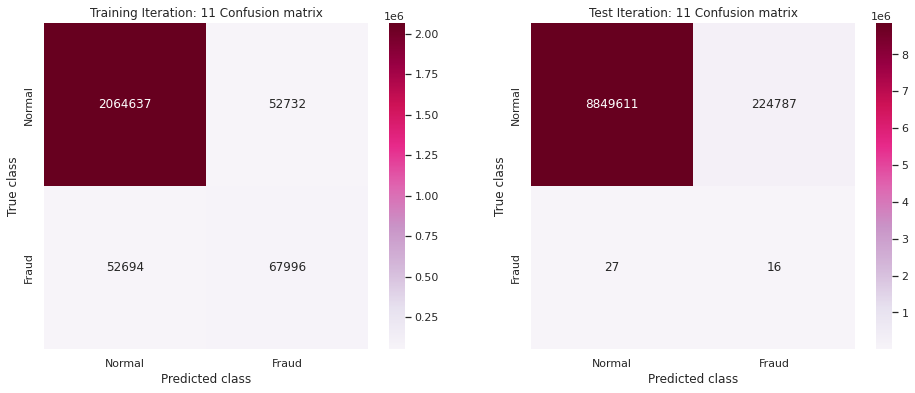

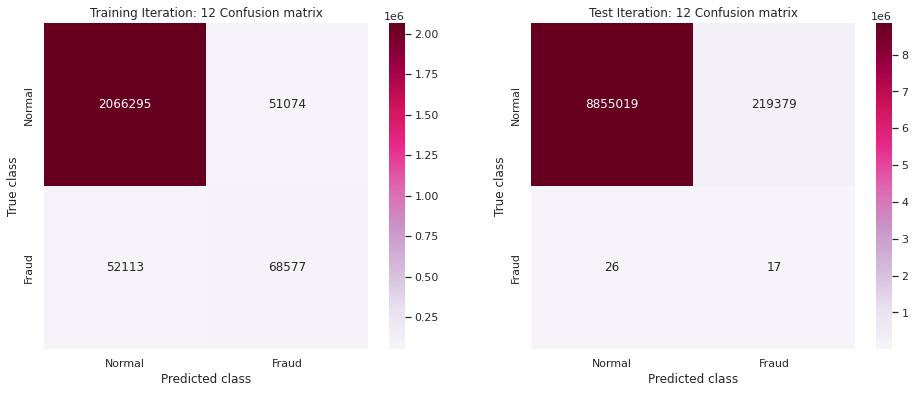

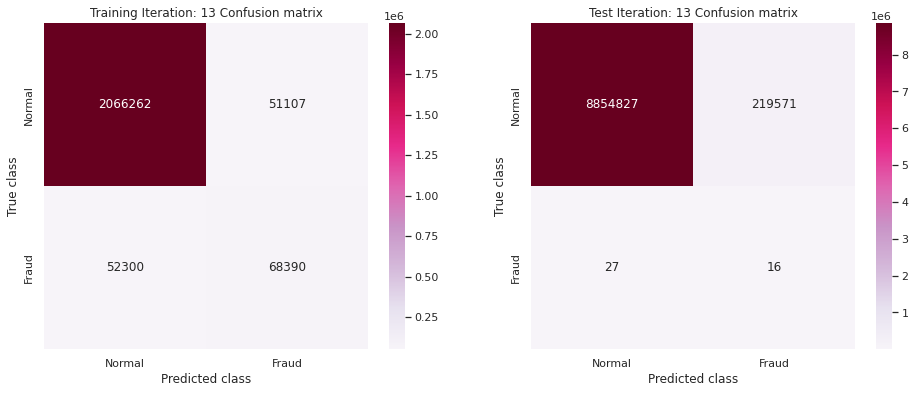

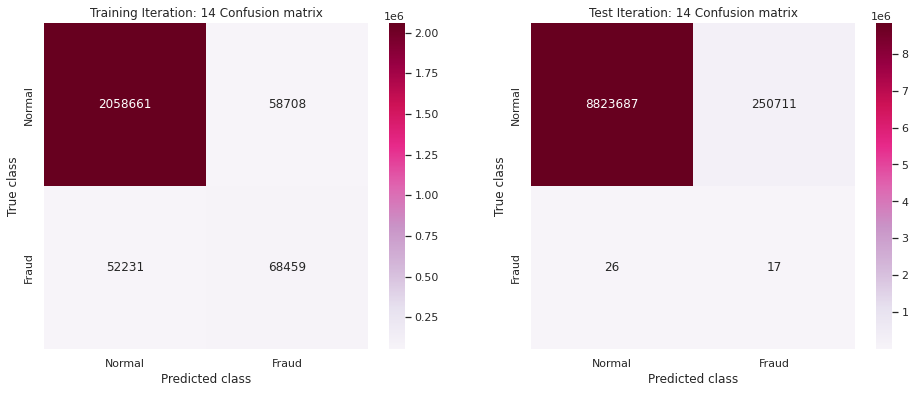

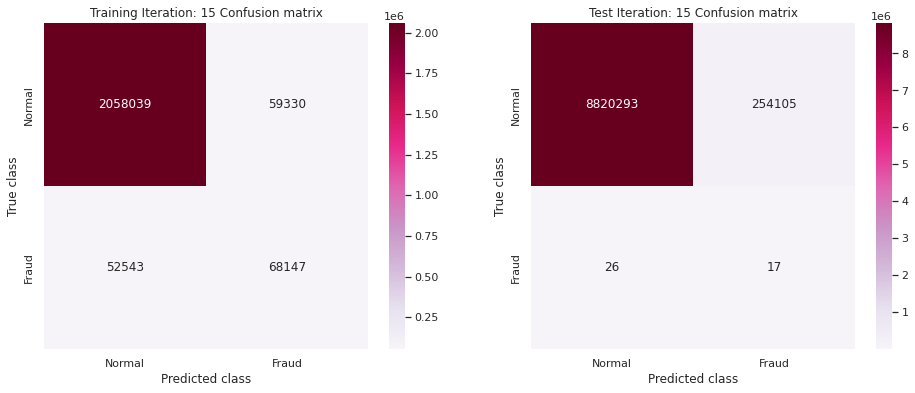

In [42]:
def conf_matrix_normal(conf_matrix_train, conf_matrix_test, iteration):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    LABELS = ["Normal", "Fraud"]

    sns.heatmap(conf_matrix_train, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax1, cmap="PuRd");
    ax1.set_title("Training Iteration: "+str(iteration)+" Confusion matrix")
    ax1.set_ylabel('True class')
    ax1.set_xlabel('Predicted class')


    sns.heatmap(conf_matrix_test, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax2, cmap="PuRd");
    ax2.set_title("Test Iteration: "+str(iteration)+" Confusion matrix")
    ax2.set_ylabel('True class')
    ax2.set_xlabel('Predicted class')


for it in iterations:
    cnf_mtx_train = eval_train[it]['conf_matrix']
    cnf_mtx_test = eval_test[it]['conf_matrix']
    conf_matrix_normal(cnf_mtx_train, cnf_mtx_test, it)